<a href="https://colab.research.google.com/github/AHussain0418/AllenDataAnalysis_/blob/main/New_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Data Analysis

# Objective: Read in 16 new NWB files and gather metrics from each of them to put into our classifier.

## Data Wrangling and Cleaning

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
from pynwb import NWBHDF5IO
import scipy as stats

In [ ]:
time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):

    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = units.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )


In [ ]:
def calculate_distance(array):
    max_value = np.max(array)  # Find the maximum value in the entire array

    for sub_array in array:
        if max_value in sub_array:
            current_min = np.min(sub_array)
            current_max = np.max(sub_array)
            current_distance = np.where(sub_array == current_max)[0][0] - np.where(sub_array == current_min)[0][0]
            current_distance = abs(current_distance)
    return current_distance

In [ ]:
calculate_distance(units.loc[35].waveform_mean)

5

In [ ]:
units.loc[35]

presence_ratio                                                       0.99
local_index                                                            17
isolation_distance                                              38.664825
velocity_below                                                  -0.343384
waveform_duration                                                0.151089
peak_channel_id                                                         9
nn_hit_rate                                                      0.816667
spread                                                               60.0
nn_miss_rate                                                     0.000134
waveform_halfwidth                                               0.096147
firing_rate                                                      0.900749
repolarization_slope                                             1.367915
amplitude                                                      383.931405
l_ratio                               

In [ ]:
len(units.loc[18].waveform_mean)

384

In [ ]:
 def unitss(file):
  io = NWBHDF5IO(f"{file}", mode="r",load_namespaces = bool(True))
  nwbfile = io.read()
  trials = nwbfile.processing.get('optotagging').get('optogenetic_stimulation')
  units = nwbfile.units[:]
  trials = trials[:]
  da = optotagging_spike_counts(bin_edges, trials, units)
  baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))
  baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008
  evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))
  evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008
  cre_pos_units = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors
  return units,cre_pos_units

In [ ]:
[units_198,cre_pos_units_198] = unitss(r"E:\Bastos Lab\New Files\sub_1169714193+sess_1180116198_ecephys.nwb")
[units_304,cre_pos_units_304] = unitss(r"E:\Bastos Lab\New Files\sub_1186895119+sess_1204677304_ecephys-002.nwb")
[units_890,cre_pos_units_890] = unitss(r"E:\Bastos Lab\New Files\sub_1186895128+sess_1203581890_ecephys-006.nwb")
[units_460,cre_pos_units_460] = unitss(r"E:\Bastos Lab\New Files\sub_1196154905+sess_1211241460_ecephys-007.nwb")
[units_107,cre_pos_units_107] = unitss(r"E:\Bastos Lab\New Files\sub_1196167186+sess_1210866107_ecephys.nwb")
[units_512,cre_pos_units_512] = unitss(r"E:\Bastos Lab\New Files\sub_1196664789+sess_1212569512_ecephys.nwb")
[units_633,cre_pos_units_633] = unitss(r"E:\Bastos Lab\New Files\sub_1197684876+sess_1213341633_ecephys-001.nwb")
[units_117,cre_pos_units_117] = unitss(r"E:\Bastos Lab\New Files\sub_1199273437+sess_1214578117_ecephys.nwb")
[units_788,cre_pos_units_788] = unitss(r"E:\Bastos Lab\New Files\sub_1202441642+sess_1217213788_ecephys-005.nwb")
[units_548,cre_pos_units_548] = unitss(r"E:\Bastos Lab\New Files\sub_1210326253+sess_1221092548_ecephys-002.nwb")
[units_300,cre_pos_units_300] = unitss(r"E:\Bastos Lab\New Files\sub_1214404694+sess_1224930300_ecephys-004.nwb")
[units_314,cre_pos_units_314] = unitss(r"E:\Bastos Lab\New Files\sub_1214890319+sess_1226526314_ecephys.nwb")
[units_756,cre_pos_units_756] = unitss(r"E:\Bastos Lab\New Files\sub_1218586779+sess_1227858756_ecephys.nwb")
[units_154,cre_pos_units_154] = unitss(r"E:\Bastos Lab\New Files\sub_1223032979+sess_1232959154_ecephys.nwb")

C:\Users\Ali\AppData\Roaming\Python\Python37\site-packages\hdmf\spec\namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.5.1 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
C:\Users\Ali\AppData\Roaming\Python\Python37\site-packages\hdmf\spec\namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
C:\Users\Ali\AppData\Roaming\Python\Python37\site-packages\hdmf\spec\namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.2.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))


In [ ]:
 def stats(file):
  io = NWBHDF5IO(f"{file}", mode="r",load_namespaces = bool(True))
  nwbfile = io.read()
  trials = nwbfile.processing.get('optotagging').get('optogenetic_stimulation')
  units = nwbfile.units[:]
  trials = trials[:]
  da = optotagging_spike_counts(bin_edges, trials, units)
  baseline = da.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))
  baseline_rate = baseline.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008
  evoked = da.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))
  evoked_rate = evoked.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008
  cre_pos_units = da.unit_id[(evoked_rate / (baseline_rate + 1)) > 2].values # add 1 to prevent divide-by-zero errors
  recov_slope = np.empty((len(cre_pos_units)+1,1))
  repolar_slope = np.empty((len(cre_pos_units)+1,1))
  firing_rate = np.empty((len(cre_pos_units)+1,1))
  waveform_duration = np.empty((len(cre_pos_units)+1,1))
  waveform_amplitude = np.empty((len(cre_pos_units)+1,1))
  ptt = np.empty((len(cre_pos_units)+1,1))

  amp_cutoff = np.empty((len(cre_pos_units)+1,1))
  pt_ratio = np.empty((len(cre_pos_units)+1,1))
  cumu_drift = np.empty((len(cre_pos_units)+1,1))
  vel_below = np.empty((len(cre_pos_units)+1,1))
  sil_score = np.empty((len(cre_pos_units)+1,1))
  NN_hit = np.empty((len(cre_pos_units)+1,1))
  iso_distance = np.empty((len(cre_pos_units)+1,1))
  l_rat = np.empty((len(cre_pos_units)+1,1))
  d_pri = np.empty((len(cre_pos_units)+1,1))
  NN_miss = np.empty((len(cre_pos_units)+1,1))
  presence = np.empty((len(cre_pos_units)+1,1))
  halfwidth = np.empty((len(cre_pos_units)+1,1))
  isi = np.empty((len(cre_pos_units)+1,1))
  spread_values = np.empty((len(cre_pos_units)+1,1))
  maximum_drift = np.empty((len(cre_pos_units)+1,1))
  n = 0
  for unit_id in cre_pos_units:
    recov_slope[n] = units.loc[unit_id].recovery_slope
    repolar_slope[n] = units.loc[unit_id].repolarization_slope
    firing_rate[n] = units.loc[unit_id].firing_rate
    waveform_duration[n] = units.loc[unit_id].waveform_duration
    waveform_amplitude[n] = units.loc[unit_id].amplitude
    ptt[n] = calculate_distance(units.loc[unit_id].waveform_mean)
    amp_cutoff[n] = units.loc[unit_id].amplitude_cutoff
    pt_ratio[n] = units.loc[unit_id].PT_ratio
    cumu_drift[n] = units.loc[unit_id].cumulative_drift
    vel_below[n] = units.loc[unit_id].velocity_below
    sil_score[n] = units.loc[unit_id].silhouette_score
    NN_hit[n] = units.loc[unit_id].nn_hit_rate
    iso_distance[n] = units.loc[unit_id].isolation_distance
    l_rat[n] = units.loc[unit_id].l_ratio
    d_pri[n] = units.loc[unit_id].d_prime
    NN_miss[n] = units.loc[unit_id].nn_miss_rate
    presence[n] = units.loc[unit_id].presence_ratio
    halfwidth[n] = units.loc[unit_id].waveform_halfwidth
    isi[n] = units.loc[unit_id].isi_violations
    spread_values[n] = units.loc[unit_id].spread
    maximum_drift[n] = units.loc[unit_id].max_drift
    n += 1

  recov_slope = np.delete(recov_slope,(len(recov_slope)-1),0)
  repolar_slope = np.delete(repolar_slope,(len(repolar_slope)-1),0)
  firing_rate = np.delete(firing_rate,(len(firing_rate)-1),0)
  waveform_duration = np.delete(waveform_duration,(len(waveform_duration)-1),0)
  waveform_amplitude = np.delete(waveform_amplitude,(len(waveform_amplitude)-1),0)
  ptt = np.delete(ptt,(len(ptt)-1),0)
  amp_cutoff = np.delete(amp_cutoff,(len(amp_cutoff)-1),0)
  pt_ratio = np.delete(pt_ratio,(len(pt_ratio)-1),0)
  cumu_drift = np.delete(cumu_drift,(len(cumu_drift)-1),0)
  vel_below = np.delete(vel_below,(len(vel_below)-1),0)
  sil_score = np.delete(sil_score,(len(sil_score)-1),0)
  NN_hit = np.delete(NN_hit,(len(NN_hit)-1),0)
  iso_distance = np.delete(iso_distance,(len(iso_distance)-1),0)
  l_rat = np.delete(l_rat,(len(l_rat)-1),0)
  d_pri = np.delete(d_pri,(len(d_pri)-1),0)
  NN_miss = np.delete(NN_miss,(len(NN_miss)-1),0)
  presence = np.delete(presence,(len(presence)-1),0)
  halfwidth = np.delete(halfwidth,(len(halfwidth)-1),0)
  isi = np.delete(isi,(len(isi)-1),0)
  spread_values = np.delete(spread_values,(len(spread_values)-1),0)
  maximum_drift = np.delete(maximum_drift,(len(maximum_drift)-1),0)
  return recov_slope,firing_rate,repolar_slope,firing_rate,waveform_duration,waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sil_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values,maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1169714193+sess_1180116198_ecephys.nwb")
pval_198_recov = recov_slope
pval_198_repolar = repolar_slope
pval_198_firing = firing_rate
pval_198_duration = waveform_duration
pval_198_amplitude = waveform_amplitude
pval_198_ptt = ptt
pval_198_ampcutoff = amp_cutoff
pval_198_ptratio = pt_ratio
pval_198_cumudrift = cumu_drift
pval_198_velbelow = vel_below
pval_198_sliscore = sli_score
pval_198_NNhit = NN_hit
pval_198_isodistance = iso_distance
pval_198_lrat = l_rat
pval_198_dpri = d_pri
pval_198_nnmiss = NN_miss
pval_198_presence = presence
pval_198_halfwidth = halfwidth
pval_198_isi = isi
pval_198_spreadvalues = spread_values
pval_198_maxdrift = maximum_drift

C:\Users\Ali\AppData\Roaming\Python\Python37\site-packages\hdmf\spec\namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.5.1 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
C:\Users\Ali\AppData\Roaming\Python\Python37\site-packages\hdmf\spec\namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.6.0-alpha is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
C:\Users\Ali\AppData\Roaming\Python\Python37\site-packages\hdmf\spec\namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.2.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))


In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1170220951+sess_1186358749_ecephys-002.nwb")
sst_749_recov = recov_slope
sst_749_repolar = repolar_slope
sst_749_firing = firing_rate
sst_749_duration = waveform_duration
sst_749_amplitude = waveform_amplitude
sst_749_ptt = ptt
sst_749_ampcutoff = amp_cutoff
sst_749_ptratio = pt_ratio
sst_749_cumudrift = cumu_drift
sst_749_velbelow = vel_below
sst_749_sliscore = sli_score
sst_749_NNhit = NN_hit
sst_749_isodistance = iso_distance
sst_749_lrat = l_rat
sst_749_dpri = d_pri
sst_749_nnmiss = NN_miss
sst_749_presence = presence
sst_749_halfwidth = halfwidth
sst_749_isi = isi
sst_749_spreadvalues = spread_values
sst_749_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1170425953+sess_1179909741_ecephys.nwb")
sst_741_recov = recov_slope
sst_741_repolar = repolar_slope
sst_741_firing = firing_rate
sst_741_duration = waveform_duration
sst_741_amplitude = waveform_amplitude
sst_741_ptt = ptt
sst_741_ampcutoff = amp_cutoff
sst_741_ptratio = pt_ratio
sst_741_cumudrift = cumu_drift
sst_741_velbelow = vel_below
sst_741_sliscore = sli_score
sst_741_NNhit = NN_hit
sst_741_isodistance = iso_distance
sst_741_lrat = l_rat
sst_741_dpri = d_pri
sst_741_nnmiss = NN_miss
sst_741_presence = presence
sst_741_halfwidth = halfwidth
sst_741_isi = isi
sst_741_spreadvalues = spread_values
sst_741_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1186895119+sess_1204677304_ecephys-002.nwb")
sst_304_recov = recov_slope
sst_304_repolar = repolar_slope
sst_304_firing = firing_rate
sst_304_duration = waveform_duration
sst_304_amplitude = waveform_amplitude
sst_304_ptt = ptt
sst_304_ampcutoff = amp_cutoff
sst_304_ptratio = pt_ratio
sst_304_cumudrift = cumu_drift
sst_304_velbelow = vel_below
sst_304_sliscore = sli_score
sst_304_NNhit = NN_hit
sst_304_isodistance = iso_distance
sst_304_lrat = l_rat
sst_304_dpri = d_pri
sst_304_nnmiss = NN_miss
sst_304_presence = presence
sst_304_halfwidth = halfwidth
sst_304_isi = isi
sst_304_spreadvalues = spread_values
sst_304_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] =  stats(r"E:\Bastos Lab\New Files\sub_1186895128+sess_1203581890_ecephys-006.nwb")
sst_890_recov = recov_slope
sst_890_repolar = repolar_slope
sst_890_firing = firing_rate
sst_890_duration = waveform_duration
sst_890_amplitude = waveform_amplitude
sst_890_ptt = ptt
sst_890_ampcutoff = amp_cutoff
sst_890_ptratio = pt_ratio
sst_890_cumudrift = cumu_drift
sst_890_velbelow = vel_below
sst_890_sliscore = sli_score
sst_890_NNhit = NN_hit
sst_890_isodistance = iso_distance
sst_890_lrat = l_rat
sst_890_dpri = d_pri
sst_890_nnmiss = NN_miss
sst_890_presence = presence
sst_890_halfwidth = halfwidth
sst_890_isi = isi
sst_890_spreadvalues = spread_values
sst_890_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] =  stats(r"E:\Bastos Lab\New Files\sub_1196154905+sess_1211241460_ecephys-007.nwb")
pval_460_recov = recov_slope
pval_460_repolar = repolar_slope
pval_460_firing = firing_rate
pval_460_duration = waveform_duration
pval_460_amplitude = waveform_amplitude
pval_460_ptt = ptt
pval_460_ampcutoff = amp_cutoff
pval_460_ptratio = pt_ratio
pval_460_cumudrift = cumu_drift
pval_460_velbelow = vel_below
pval_460_sliscore = sli_score
pval_460_NNhit = NN_hit
pval_460_isodistance = iso_distance
pval_460_lrat = l_rat
pval_460_dpri = d_pri
pval_460_nnmiss = NN_miss
pval_460_presence = presence
pval_460_halfwidth = halfwidth
pval_460_isi = isi
pval_460_spreadvalues = spread_values
pval_460_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1196167186+sess_1210866107_ecephys.nwb")
pval_107_recov = recov_slope
pval_107_repolar = repolar_slope
pval_107_firing = firing_rate
pval_107_duration = waveform_duration
pval_107_amplitude = waveform_amplitude
pval_107_ptt = ptt
pval_107_ampcutoff = amp_cutoff
pval_107_ptratio = pt_ratio
pval_107_cumudrift = cumu_drift
pval_107_velbelow = vel_below
pval_107_sliscore = sli_score
pval_107_NNhit = NN_hit
pval_107_isodistance = iso_distance
pval_107_lrat = l_rat
pval_107_dpri = d_pri
pval_107_nnmiss = NN_miss
pval_107_presence = presence
pval_107_halfwidth = halfwidth
pval_107_isi = isi
pval_107_spreadvalues = spread_values
pval_107_maxdrift = maximum_drift


In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1196664789+sess_1212569512_ecephys.nwb")
pval_512_recov = recov_slope
pval_512_repolar = repolar_slope
pval_512_firing = firing_rate
pval_512_duration = waveform_duration
pval_512_amplitude = waveform_amplitude
pval_512_ptt = ptt
pval_512_ampcutoff = amp_cutoff
pval_512_ptratio = pt_ratio
pval_512_cumudrift = cumu_drift
pval_512_velbelow = vel_below
pval_512_sliscore = sli_score
pval_512_NNhit = NN_hit
pval_512_isodistance = iso_distance
pval_512_lrat = l_rat
pval_512_dpri = d_pri
pval_512_nnmiss = NN_miss
pval_512_presence = presence
pval_512_halfwidth = halfwidth
pval_512_isi = isi
pval_512_spreadvalues = spread_values
pval_512_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1197684876+sess_1213341633_ecephys-001.nwb")
pval_633_recov = recov_slope
pval_633_repolar = repolar_slope
pval_633_firing = firing_rate
pval_633_duration = waveform_duration
pval_633_amplitude = waveform_amplitude
pval_633_ptt = ptt
pval_633_ampcutoff = amp_cutoff
pval_633_ptratio = pt_ratio
pval_633_cumudrift = cumu_drift
pval_633_velbelow = vel_below
pval_633_sliscore = sli_score
pval_633_NNhit = NN_hit
pval_633_isodistance = iso_distance
pval_633_lrat = l_rat
pval_633_dpri = d_pri
pval_633_nnmiss = NN_miss
pval_633_presence = presence
pval_633_halfwidth = halfwidth
pval_633_isi = isi
pval_633_spreadvalues = spread_values
pval_633_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1199273437+sess_1214578117_ecephys.nwb")
sst_117_recov = recov_slope
sst_117_repolar = repolar_slope
sst_117_firing = firing_rate
sst_117_duration = waveform_duration
sst_117_amplitude = waveform_amplitude
sst_117_ptt = ptt
sst_117_ampcutoff = amp_cutoff
sst_117_ptratio = pt_ratio
sst_117_cumudrift = cumu_drift
sst_117_velbelow = vel_below
sst_117_sliscore = sli_score
sst_117_NNhit = NN_hit
sst_117_isodistance = iso_distance
sst_117_lrat = l_rat
sst_117_dpri = d_pri
sst_117_nnmiss = NN_miss
sst_117_presence = presence
sst_117_halfwidth = halfwidth
sst_117_isi = isi
sst_117_spreadvalues = spread_values
sst_117_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1202441642+sess_1217213788_ecephys-005.nwb")
pval_788_recov = recov_slope
pval_788_repolar = repolar_slope
pval_788_firing = firing_rate
pval_788_duration = waveform_duration
pval_788_amplitude = waveform_amplitude
pval_788_ptt = ptt
pval_788_ampcutoff = amp_cutoff
pval_788_ptratio = pt_ratio
pval_788_cumudrift = cumu_drift
pval_788_velbelow = vel_below
pval_788_sliscore = sli_score
pval_788_NNhit = NN_hit
pval_788_isodistance = iso_distance
pval_788_lrat = l_rat
pval_788_dpri = d_pri
pval_788_nnmiss = NN_miss
pval_788_presence = presence
pval_788_halfwidth = halfwidth
pval_788_isi = isi
pval_788_spreadvalues = spread_values
pval_788_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1210326253+sess_1221092548_ecephys-002.nwb")
sst_548_recov = recov_slope
sst_548_repolar = repolar_slope
sst_548_firing = firing_rate
sst_548_duration = waveform_duration
sst_548_amplitude = waveform_amplitude
sst_548_ptt = ptt
sst_548_ampcutoff = amp_cutoff
sst_548_ptratio = pt_ratio
sst_548_cumudrift = cumu_drift
sst_548_velbelow = vel_below
sst_548_sliscore = sli_score
sst_548_NNhit = NN_hit
sst_548_isodistance = iso_distance
sst_548_lrat = l_rat
sst_548_dpri = d_pri
sst_548_nnmiss = NN_miss
sst_548_presence = presence
sst_548_halfwidth = halfwidth
sst_548_isi = isi
sst_548_spreadvalues = spread_values
sst_548_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1214404694+sess_1224930300_ecephys-004.nwb")
sst_300_recov = recov_slope
sst_300_repolar = repolar_slope
sst_300_firing = firing_rate
sst_300_duration = waveform_duration
sst_300_amplitude = waveform_amplitude
sst_300_ptt = ptt
sst_300_ampcutoff = amp_cutoff
sst_300_ptratio = pt_ratio
sst_300_cumudrift = cumu_drift
sst_300_velbelow = vel_below
sst_300_sliscore = sli_score
sst_300_NNhit = NN_hit
sst_300_isodistance = iso_distance
sst_300_lrat = l_rat
sst_300_dpri = d_pri
sst_300_nnmiss = NN_miss
sst_300_presence = presence
sst_300_halfwidth = halfwidth
sst_300_isi = isi
sst_300_spreadvalues = spread_values
sst_300_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1214890319+sess_1226526314_ecephys.nwb")
pval_314_recov = recov_slope
pval_314_repolar = repolar_slope
pval_314_firing = firing_rate
pval_314_duration = waveform_duration
pval_314_amplitude = waveform_amplitude
pval_314_ptt = ptt
pval_314_ampcutoff = amp_cutoff
pval_314_ptratio = pt_ratio
pval_314_cumudrift = cumu_drift
pval_314_velbelow = vel_below
pval_314_sliscore = sli_score
pval_314_NNhit = NN_hit
pval_314_isodistance = iso_distance
pval_314_lrat = l_rat
pval_314_dpri = d_pri
pval_314_nnmiss = NN_miss
pval_314_presence = presence
pval_314_halfwidth = halfwidth
pval_314_isi = isi
pval_314_spreadvalues = spread_values
pval_314_maxdrift = maximum_drift


In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1218586779+sess_1227858756_ecephys.nwb")
sst_756_recov = recov_slope
sst_756_repolar = repolar_slope
sst_756_firing = firing_rate
sst_756_duration = waveform_duration
sst_756_amplitude = waveform_amplitude
sst_756_ptt = ptt
sst_756_ampcutoff = amp_cutoff
sst_756_ptratio = pt_ratio
sst_756_cumudrift = cumu_drift
sst_756_velbelow = vel_below
sst_756_sliscore = sli_score
sst_756_NNhit = NN_hit
sst_756_isodistance = iso_distance
sst_756_lrat = l_rat
sst_756_dpri = d_pri
sst_756_nnmiss = NN_miss
sst_756_presence = presence
sst_756_halfwidth = halfwidth
sst_756_isi = isi
sst_756_spreadvalues = spread_values
sst_756_maxdrift = maximum_drift

In [ ]:
[recov_slope, firing_rate, repolar_slope, firing_rate, waveform_duration, waveform_amplitude,ptt,amp_cutoff,pt_ratio,cumu_drift,vel_below,sli_score,NN_hit,iso_distance,l_rat,d_pri,NN_miss,presence,halfwidth,isi,spread_values, maximum_drift] = stats(r"E:\Bastos Lab\New Files\sub_1223032979+sess_1232959154_ecephys.nwb")
sst_154_recov = recov_slope
sst_154_repolar = repolar_slope
sst_154_firing = firing_rate
sst_154_duration = waveform_duration
sst_154_amplitude = waveform_amplitude
sst_154_ptt = ptt
sst_154_ampcutoff = amp_cutoff
sst_154_ptratio = pt_ratio
sst_154_cumudrift = cumu_drift
sst_154_velbelow = vel_below
sst_154_sliscore = sli_score
sst_154_NNhit = NN_hit
sst_154_isodistance = iso_distance
sst_154_lrat = l_rat
sst_154_dpri = d_pri
sst_154_nnmiss = NN_miss
sst_154_presence = presence
sst_154_halfwidth = halfwidth
sst_154_isi = isi
sst_154_spreadvalues = spread_values
sst_154_maxdrift = maximum_drift

## Combining into DFs

In [ ]:
sst_df = pd.DataFrame((np.concatenate((sst_117_recov,sst_154_recov,sst_300_recov,sst_304_recov,sst_548_recov,sst_741_recov,sst_749_recov,sst_756_recov,sst_890_recov))).astype(float),columns= ['recov'])
sst_df['repolar'] = (np.concatenate((sst_117_repolar,sst_154_repolar,sst_300_repolar,sst_304_repolar,sst_548_repolar,sst_741_repolar,sst_749_repolar,sst_756_repolar,sst_890_repolar))).astype(float)
sst_df['firing'] = (np.concatenate((sst_117_firing,sst_154_firing,sst_300_firing,sst_304_firing,sst_548_firing,sst_741_firing,sst_749_firing,sst_756_firing,sst_890_firing))).astype(float)
sst_df['duration'] = (np.concatenate((sst_117_duration,sst_154_duration,sst_300_duration,sst_304_duration,sst_548_duration,sst_741_duration,sst_749_duration,sst_756_duration,sst_890_duration))).astype(float)
sst_df['amplitude'] = (np.concatenate((sst_117_amplitude,sst_154_amplitude,sst_300_amplitude,sst_304_amplitude,sst_548_amplitude,sst_741_amplitude,sst_749_amplitude,sst_756_amplitude,sst_890_amplitude))).astype(float)
sst_df['ptt'] = (np.concatenate((sst_117_ptt,sst_154_ptt,sst_300_ptt,sst_304_ptt,sst_548_ptt,sst_741_ptt,sst_749_ptt,sst_756_ptt,sst_890_ptt))).astype(float)
sst_df['ampcutoff'] = (np.concatenate((sst_117_ampcutoff,sst_154_ampcutoff,sst_300_ampcutoff,sst_304_ampcutoff,sst_548_ampcutoff,sst_741_ampcutoff,sst_749_ampcutoff,sst_756_ampcutoff,sst_890_ampcutoff))).astype(float)
sst_df['ptratio'] = (np.concatenate((sst_117_ptratio,sst_154_ptratio,sst_300_ptratio,sst_304_ptratio,sst_548_ptratio,sst_741_ptratio,sst_749_ptratio,sst_756_ptratio,sst_890_ptratio))).astype(float)
sst_df['cumudrift'] = (np.concatenate((sst_117_cumudrift,sst_154_cumudrift,sst_300_cumudrift,sst_304_cumudrift,sst_548_cumudrift,sst_741_cumudrift,sst_749_cumudrift,sst_756_cumudrift,sst_890_cumudrift))).astype(float)
sst_df['velbelow'] = (np.concatenate((sst_117_velbelow,sst_154_velbelow,sst_300_velbelow,sst_304_velbelow,sst_548_velbelow,sst_741_velbelow,sst_749_velbelow,sst_756_velbelow,sst_890_velbelow))).astype(float)
sst_df['sliscore'] = (np.concatenate((sst_117_sliscore,sst_154_sliscore,sst_300_sliscore,sst_304_sliscore,sst_548_sliscore,sst_741_sliscore,sst_749_sliscore,sst_756_sliscore,sst_890_sliscore))).astype(float)
sst_df['NNhit'] = (np.concatenate((sst_117_NNhit,sst_154_NNhit,sst_300_NNhit,sst_304_NNhit,sst_548_NNhit,sst_741_NNhit,sst_749_NNhit,sst_756_NNhit,sst_890_NNhit))).astype(float)
sst_df['isodistance'] = (np.concatenate((sst_117_isodistance,sst_154_isodistance,sst_300_isodistance,sst_304_isodistance,sst_548_isodistance,sst_741_isodistance,sst_749_isodistance,sst_756_isodistance,sst_890_isodistance))).astype(float)
sst_df['lrat'] = (np.concatenate((sst_117_lrat,sst_154_lrat,sst_300_lrat,sst_304_lrat,sst_548_lrat,sst_741_lrat,sst_749_lrat,sst_756_lrat,sst_890_lrat))).astype(float)
sst_df['dpri'] = (np.concatenate((sst_117_dpri,sst_154_dpri,sst_300_dpri,sst_304_dpri,sst_548_dpri,sst_741_dpri,sst_749_dpri,sst_756_dpri,sst_890_dpri))).astype(float)
sst_df['nnmiss'] = (np.concatenate((sst_117_nnmiss,sst_154_nnmiss,sst_300_nnmiss,sst_304_nnmiss,sst_548_nnmiss,sst_741_nnmiss,sst_749_nnmiss,sst_756_nnmiss,sst_890_nnmiss))).astype(float)
sst_df['presence'] = (np.concatenate((sst_117_presence,sst_154_presence,sst_300_presence,sst_304_presence,sst_548_presence,sst_741_presence,sst_749_presence,sst_756_presence,sst_890_presence))).astype(float)
sst_df['halfwidth'] = (np.concatenate((sst_117_halfwidth,sst_154_halfwidth,sst_300_halfwidth,sst_304_halfwidth,sst_548_halfwidth,sst_741_halfwidth,sst_749_halfwidth,sst_756_halfwidth,sst_890_halfwidth))).astype(float)
sst_df['isi'] = (np.concatenate((sst_117_isi,sst_154_isi,sst_300_isi,sst_304_isi,sst_548_isi,sst_741_isi,sst_749_isi,sst_756_isi,sst_890_isi))).astype(float)
sst_df['spreadvalues'] = (np.concatenate((sst_117_spreadvalues,sst_154_spreadvalues,sst_300_spreadvalues,sst_304_spreadvalues,sst_548_spreadvalues,sst_741_spreadvalues,sst_749_spreadvalues,sst_756_spreadvalues,sst_890_spreadvalues))).astype(float)
sst_df['maxdrift'] = (np.concatenate((sst_117_maxdrift,sst_154_maxdrift,sst_300_maxdrift,sst_304_maxdrift,sst_548_maxdrift,sst_741_maxdrift,sst_749_maxdrift,sst_756_maxdrift,sst_890_maxdrift))).astype(float)
sst_df = sst_df[sst_df != 0].dropna()
sst_df = sst_df.dropna()


pval_df = pd.DataFrame((np.concatenate((pval_107_recov,pval_198_recov,pval_314_recov,pval_460_recov,pval_512_recov,pval_633_recov,pval_788_recov))).astype(float),columns=['recov'])
pval_df['repolar'] = (np.concatenate((pval_107_repolar,pval_198_repolar,pval_314_repolar,pval_460_repolar,pval_512_repolar,pval_633_repolar,pval_788_repolar))).astype(float)
pval_df['firing'] = (np.concatenate((pval_107_firing,pval_198_firing,pval_314_firing,pval_460_firing,pval_512_firing,pval_633_firing,pval_788_firing))).astype(float)
pval_df['duration'] = (np.concatenate((pval_107_duration,pval_198_duration,pval_314_duration,pval_460_duration,pval_512_duration,pval_633_duration,pval_788_duration))).astype(float)
pval_df['amplitude'] = (np.concatenate((pval_107_amplitude,pval_198_amplitude,pval_314_amplitude,pval_460_amplitude,pval_512_amplitude,pval_633_amplitude,pval_788_amplitude))).astype(float)
pval_df['ampcutoff'] = (np.concatenate((pval_107_ampcutoff,pval_198_ampcutoff,pval_314_ampcutoff,pval_460_ampcutoff,pval_512_ampcutoff,pval_633_ampcutoff,pval_788_ampcutoff))).astype(float)
pval_df['ptt'] = (np.concatenate((pval_107_ptt,pval_198_ptt,pval_314_ptt,pval_460_ptt,pval_512_ptt,pval_633_ptt,pval_788_ptt))).astype(float)
pval_df['ptratio'] = (np.concatenate((pval_107_ptratio,pval_198_ptratio,pval_314_ptratio,pval_460_ptratio,pval_512_ptratio,pval_633_ptratio,pval_788_ptratio))).astype(float)
pval_df['cumudrift'] = (np.concatenate((pval_107_cumudrift,pval_198_cumudrift,pval_314_cumudrift,pval_460_cumudrift,pval_512_cumudrift,pval_633_cumudrift,pval_788_cumudrift))).astype(float)
pval_df['velbelow'] = (np.concatenate((pval_107_velbelow,pval_198_velbelow,pval_314_velbelow,pval_460_velbelow,pval_512_velbelow,pval_633_velbelow,pval_788_velbelow))).astype(float)
pval_df['sliscore'] = (np.concatenate((pval_107_sliscore,pval_198_sliscore,pval_314_sliscore,pval_460_sliscore,pval_512_sliscore,pval_633_sliscore,pval_788_sliscore))).astype(float)
pval_df['NNhit'] = (np.concatenate((pval_107_NNhit,pval_198_NNhit,pval_314_NNhit,pval_460_NNhit,pval_512_NNhit,pval_633_NNhit,pval_788_NNhit))).astype(float)
pval_df['isodistance'] = (np.concatenate((pval_107_isodistance,pval_198_isodistance,pval_314_isodistance,pval_460_isodistance,pval_512_isodistance,pval_633_isodistance,pval_788_isodistance))).astype(float)
pval_df['lrat'] = (np.concatenate((pval_107_lrat,pval_198_lrat,pval_314_lrat,pval_460_lrat,pval_512_lrat,pval_633_lrat,pval_788_lrat))).astype(float)
pval_df['dpri'] = (np.concatenate((pval_107_dpri,pval_198_dpri,pval_314_dpri,pval_460_dpri,pval_512_dpri,pval_633_dpri,pval_788_dpri))).astype(float)
pval_df['nnmiss'] = (np.concatenate((pval_107_nnmiss,pval_198_nnmiss,pval_314_nnmiss,pval_460_nnmiss,pval_512_nnmiss,pval_633_nnmiss,pval_788_nnmiss))).astype(float)
pval_df['presence'] = (np.concatenate((pval_107_presence,pval_198_presence,pval_314_presence,pval_460_presence,pval_512_presence,pval_633_presence,pval_788_presence))).astype(float)
pval_df['halfwidth'] = (np.concatenate((pval_107_halfwidth,pval_198_halfwidth,pval_314_halfwidth,pval_460_halfwidth,pval_512_halfwidth,pval_633_halfwidth,pval_788_halfwidth))).astype(float)
pval_df['isi'] = (np.concatenate((pval_107_isi,pval_198_isi,pval_314_isi,pval_460_isi,pval_512_isi,pval_633_isi,pval_788_isi))).astype(float)
pval_df['spreadvalues'] = (np.concatenate((pval_107_spreadvalues,pval_198_spreadvalues,pval_314_spreadvalues,pval_460_spreadvalues,pval_512_spreadvalues,pval_633_spreadvalues,pval_788_spreadvalues))).astype(float)
pval_df['maxdrift'] = (np.concatenate((pval_107_maxdrift,pval_198_maxdrift,pval_314_maxdrift,pval_460_maxdrift,pval_512_maxdrift,pval_633_maxdrift,pval_788_maxdrift))).astype(float)
pval_df = pval_df[pval_df != 0].dropna()
pval_df = pval_df.dropna()

In [ ]:
dfnottag = pval_df.append(sst_df,ignore_index = True)
pval_df['target'] = 'PV'
sst_df['target'] = 'SST'
df = pval_df.append(sst_df, ignore_index= True)

In [ ]:
df

recov   repolar     firing  duration   amplitude  ampcutoff   ptt  \
0    -0.202708  1.077135  44.997197  0.247236  244.069800   0.015855   7.0   
1    -0.193491  0.725517   2.241526  0.192295  188.189625   0.500000   9.0   
2    -0.296715  0.853414   5.129161  0.164824  218.134410   0.455610   5.0   
3    -0.136176  0.723283   0.585545  0.398325  267.041385   0.112631  10.0   
4    -0.207099  0.722251   7.325388  0.302178  178.937850   0.500000   9.0   
...        ...       ...        ...       ...         ...        ...   ...   
3190 -0.008373  0.095826   3.362120  0.961474   78.332670   0.500000   2.0   
3191 -0.042390  0.268110   2.271599  0.260972  116.368980   0.193426  -5.0   
3192 -0.169074  0.893144  11.772186  0.315913  256.672650   0.009602  -6.0   
3193 -0.017789  0.422805   3.586275  0.480737  123.784440   0.500000  42.0   
3194 -0.063885  0.069789   3.619892  1.236181   81.799770   0.500000  24.0   

       ptratio  cumudrift  velbelow  ...  isodistance      lrat      dpri  \
0     0.419592     193.23 -0.343384  ...   115.302621  0.176627  2.477614   
1     0.715372     523.83 -0.016352  ...    31.281480  0.126417  3.038210   
2     0.746559     406.66  0.232365  ...    47.293930  0.059508  3.612736   
3     0.607371     103.48  0.011446  ...    14.619246  0.622817  2.032813   
4     0.662804     184.66 -0.171692  ...    68.489741  0.010666  4.088118   
...        ...        ...       ...  ...          ...       ...       ...   
3190  0.430023     611.39  0.881351  ...    58.602713  0.151304  1.819062   
3191  0.670432     226.27  0.011446  ...    -1.000000 -1.000000 -1.000000   
3192  0.638947     106.16 -0.343384  ...    61.829555  0.008716  3.518970   
3193  0.341752     311.57  1.259073  ...    33.539532  0.137188  1.966303   
3194  0.490336     535.27  0.995812  ...    38.824003  0.100167  1.598764   

        nnmiss  presence  halfwidth        isi  spreadvalues  maxdrift  target  
0     0.100658      0.99   0.137353   0.038491          50.0     34.19      PV  
1     0.002911      0.99   0.082412   6.703757         160.0     39.09      PV  
2     0.007398      0.99   0.082412   1.669025         130.0     51.43      PV  
3     0.000736      0.62   0.041206  13.585407         170.0     30.26      PV  
4     0.015042      0.99   0.164824   0.080456         150.0     25.19      PV  
...        ...       ...        ...        ...           ...       ...     ...  
3190  0.085965      0.99   0.494472   1.296903         170.0     83.48     SST  
3191 -1.000000      0.13   0.068677  43.310490         170.0     61.57     SST  
3192  0.001110      0.99   0.137353   0.014091          80.0     47.92     SST  
3193  0.025759      0.99   0.467002   1.482301         160.0     22.57     SST  
3194  0.044224      0.99   0.604355   1.401956         170.0     87.44     SST  

[3195 rows x 22 columns]

## Classification


In [ ]:
dfclassifier = df.drop(['ampcutoff','isodistance','maxdrift','dpri'],axis = 1)
labels = df['target']
features = df.drop(['target'],axis=1)

In [ ]:
np.random.seed(31435)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
features_scaled = mms.fit_transform(features)
train, test, train_labels, test_labels = train_test_split(features_scaled,
                                                          labels,
                                                          test_size=0.2)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(test_labels, preds))

0.5868544600938967


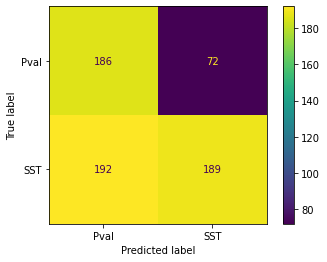

In [ ]:
from sklearn import metrics
y_true = test_labels
y_pred = preds
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Pval','SST'])
cm_display.plot()
plt.show()



## Stats


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t1 = ttest_ind(pval_df['ptt'],sst_df['ptt'])
t2 = ttest_ind(pval_df['repolar'],sst_df['repolar'])
t3 = ttest_ind(pval_df['firing'],sst_df['firing'])
t4 = ttest_ind(pval_df['duration'],sst_df['duration'])
t5 = ttest_ind(pval_df['ptt'],sst_df['ptt'])
t6 = ttest_ind(pval_df['ampcutoff'],sst_df['ampcutoff'])
t7 = ttest_ind(pval_df['ptratio'],sst_df['ptratio'])
t8 = ttest_ind(pval_df['cumudrift'],sst_df['cumudrift'])
t9 = ttest_ind(pval_df['velbelow'],sst_df['velbelow'])
t10 = ttest_ind(pval_df['sliscore'],sst_df['sliscore'])
t11 = ttest_ind(pval_df['NNhit'],sst_df['NNhit'])
t12 = ttest_ind(pval_df['isodistance'],sst_df['isodistance'])
t13 = ttest_ind(pval_df['lrat'],sst_df['lrat'])
t14 = ttest_ind(pval_df['dpri'],sst_df['dpri'])
t15 =ttest_ind(pval_df['nnmiss'],sst_df['nnmiss'])
t16 =ttest_ind(pval_df['presence'],sst_df['presence'])
t17 = ttest_ind(pval_df['halfwidth'],sst_df['halfwidth'])
t18 = ttest_ind(pval_df['isi'],sst_df['isi'])
t19 = ttest_ind(pval_df['spreadvalues'],sst_df['spreadvalues'])
t20 = ttest_ind(pval_df['maxdrift'],sst_df['maxdrift'])


In [ ]:
t20

Ttest_indResult(statistic=1.230024220049461, pvalue=0.21877865209764488)

<AxesSubplot:>

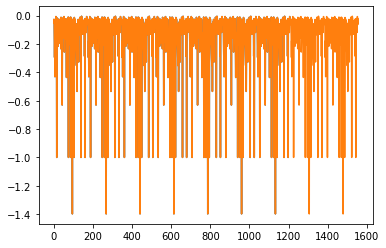

In [ ]:
pval_df['recov'].plot()
sst_df['recov'].plot()


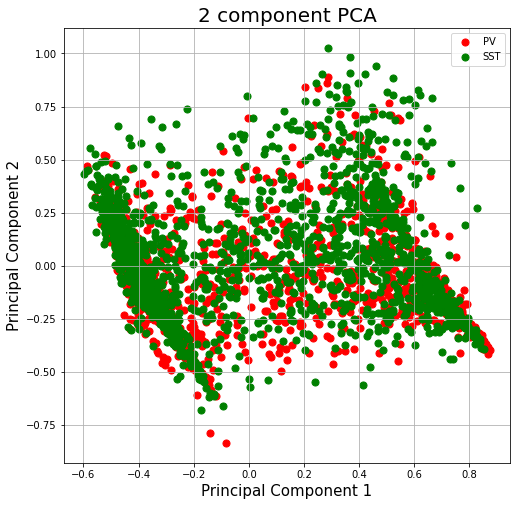

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(dfnottag)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_rescaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['PV', 'SST']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('PCA.png')

## Graphs


In [ ]:
def create_histogram(df1, df2, column_name):
    data1 = df1[column_name]
    data2 = df2[column_name]
    mean1 = data1.mean()
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

    plt.hist(data1, bins=10, alpha=0.5, label='Pval')
    plt.hist(data2, bins=10, alpha=0.5, label='SST')
    plt.axvline(mean1, color='r', linestyle='dashed', linewidth=1, label='Pval Mean')
    plt.axvline(mean2, color='b', linestyle='dashed', linewidth=1, label='SST Mean')
    plt.axvline(mean1 + std1, color='g', linestyle='dashed', linewidth=1, label='Pval Mean + Std')
    plt.axvline(mean2 + std2, color='c', linestyle='dashed', linewidth=1, label='SST Mean + Std')
    plt.axvline(mean1 - std1, color='g', linestyle='dashed', linewidth=1, label='Pval Mean - Std')
    plt.axvline(mean2 - std2, color='c', linestyle='dashed', linewidth=1, label='SST Mean - Std')

    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.legend()
    plt.show()

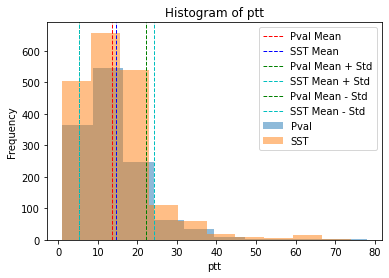

In [ ]:
create_histogram(pval_df,sst_df,'ptt')

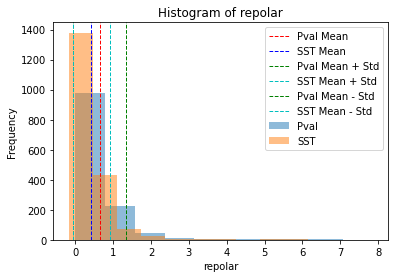

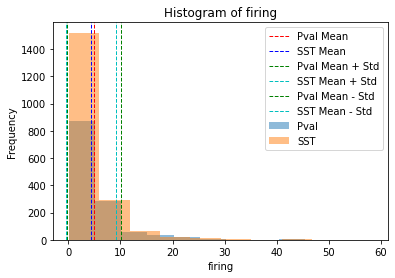

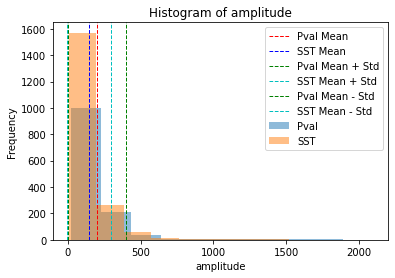

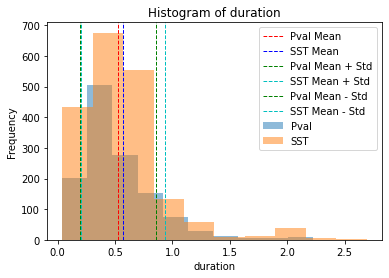

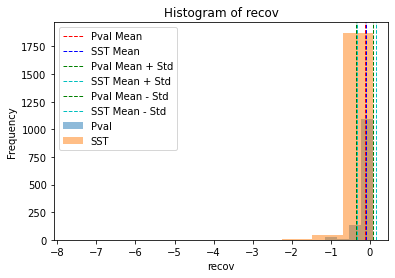

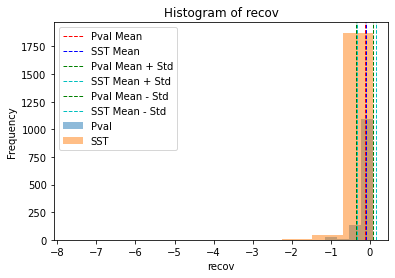

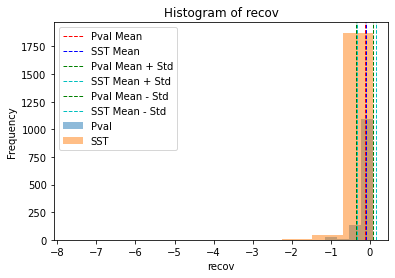

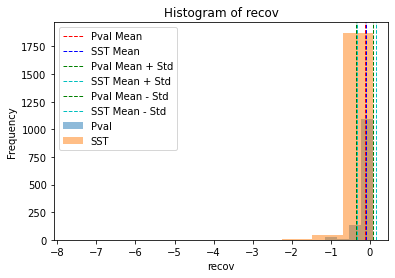

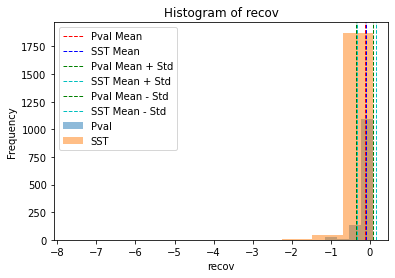

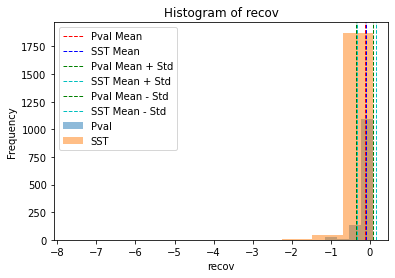

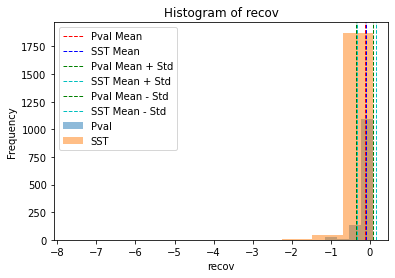

In [ ]:


# Create histogram for 'repolar' column
create_histogram(pval_df, sst_df, 'repolar')

# Create histogram for 'firing' column
create_histogram(pval_df, sst_df, 'firing')

# Create histogram for 'amplitude' column
create_histogram(pval_df, sst_df, 'amplitude')

# Create histogram for 'duration' column
create_histogram(pval_df, sst_df, 'duration')

create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')
create_histogram(pval_df, sst_df, 'recov')

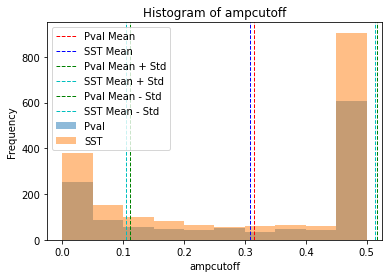

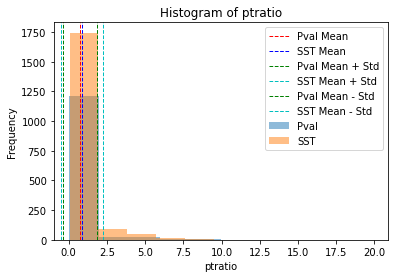

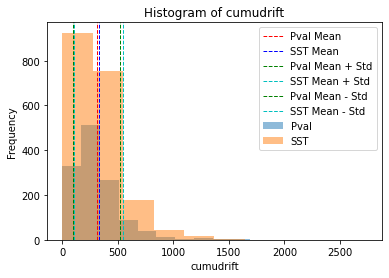

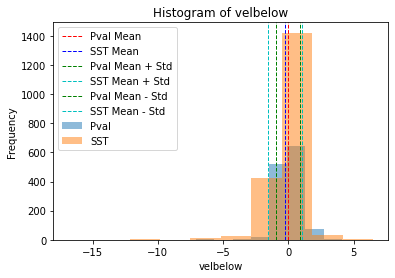

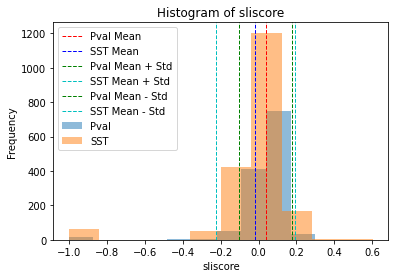

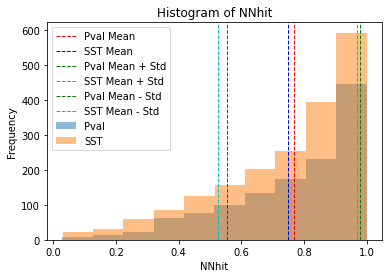

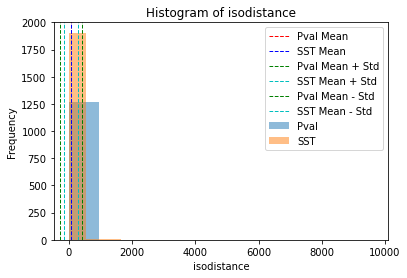

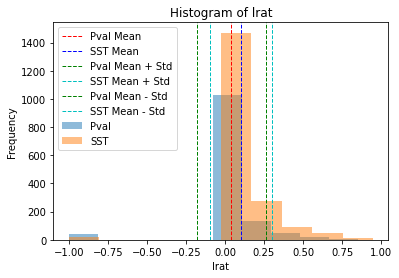

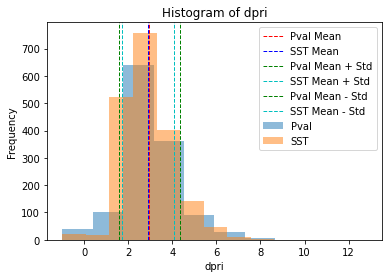

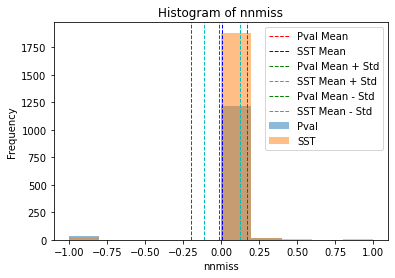

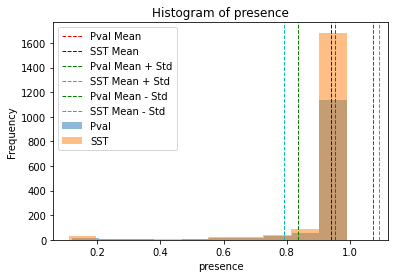

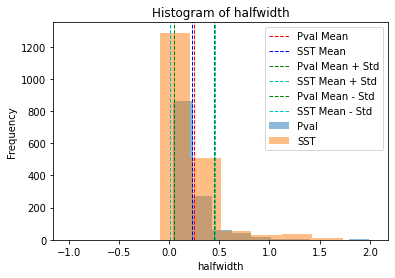

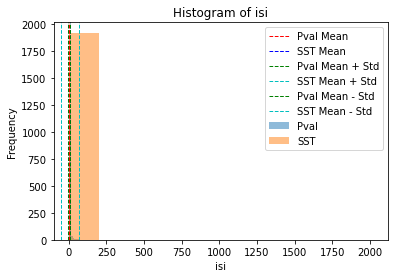

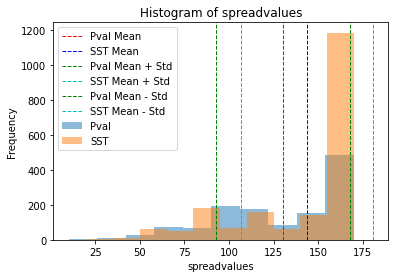

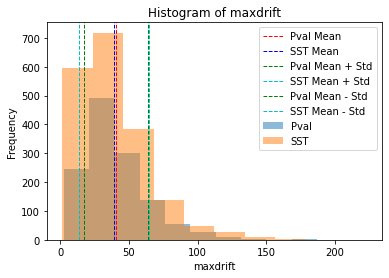

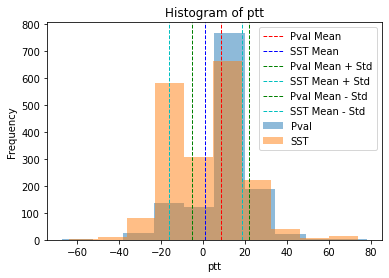

In [ ]:
create_histogram(pval_df, sst_df, 'ampcutoff')
create_histogram(pval_df, sst_df, 'ptratio')
create_histogram(pval_df, sst_df, 'cumudrift')
create_histogram(pval_df, sst_df, 'velbelow')
create_histogram(pval_df, sst_df, 'sliscore')
create_histogram(pval_df, sst_df, 'NNhit')
create_histogram(pval_df, sst_df, 'isodistance')
create_histogram(pval_df, sst_df, 'lrat')
create_histogram(pval_df, sst_df, 'dpri')
create_histogram(pval_df, sst_df, 'nnmiss')
create_histogram(pval_df, sst_df, 'presence')
create_histogram(pval_df, sst_df, 'halfwidth')
create_histogram(pval_df, sst_df, 'isi')
create_histogram(pval_df, sst_df, 'spreadvalues')
create_histogram(pval_df, sst_df, 'maxdrift')
create_histogram(pval_df, sst_df, 'ptt')


In [ ]:
git remote add origin https://github.com/AHussain0418/AllenDataAnalysis_.git
git branch -M main
git push -u origin main

SyntaxError: ignored

<Figure size 7200x4800 with 0 Axes>

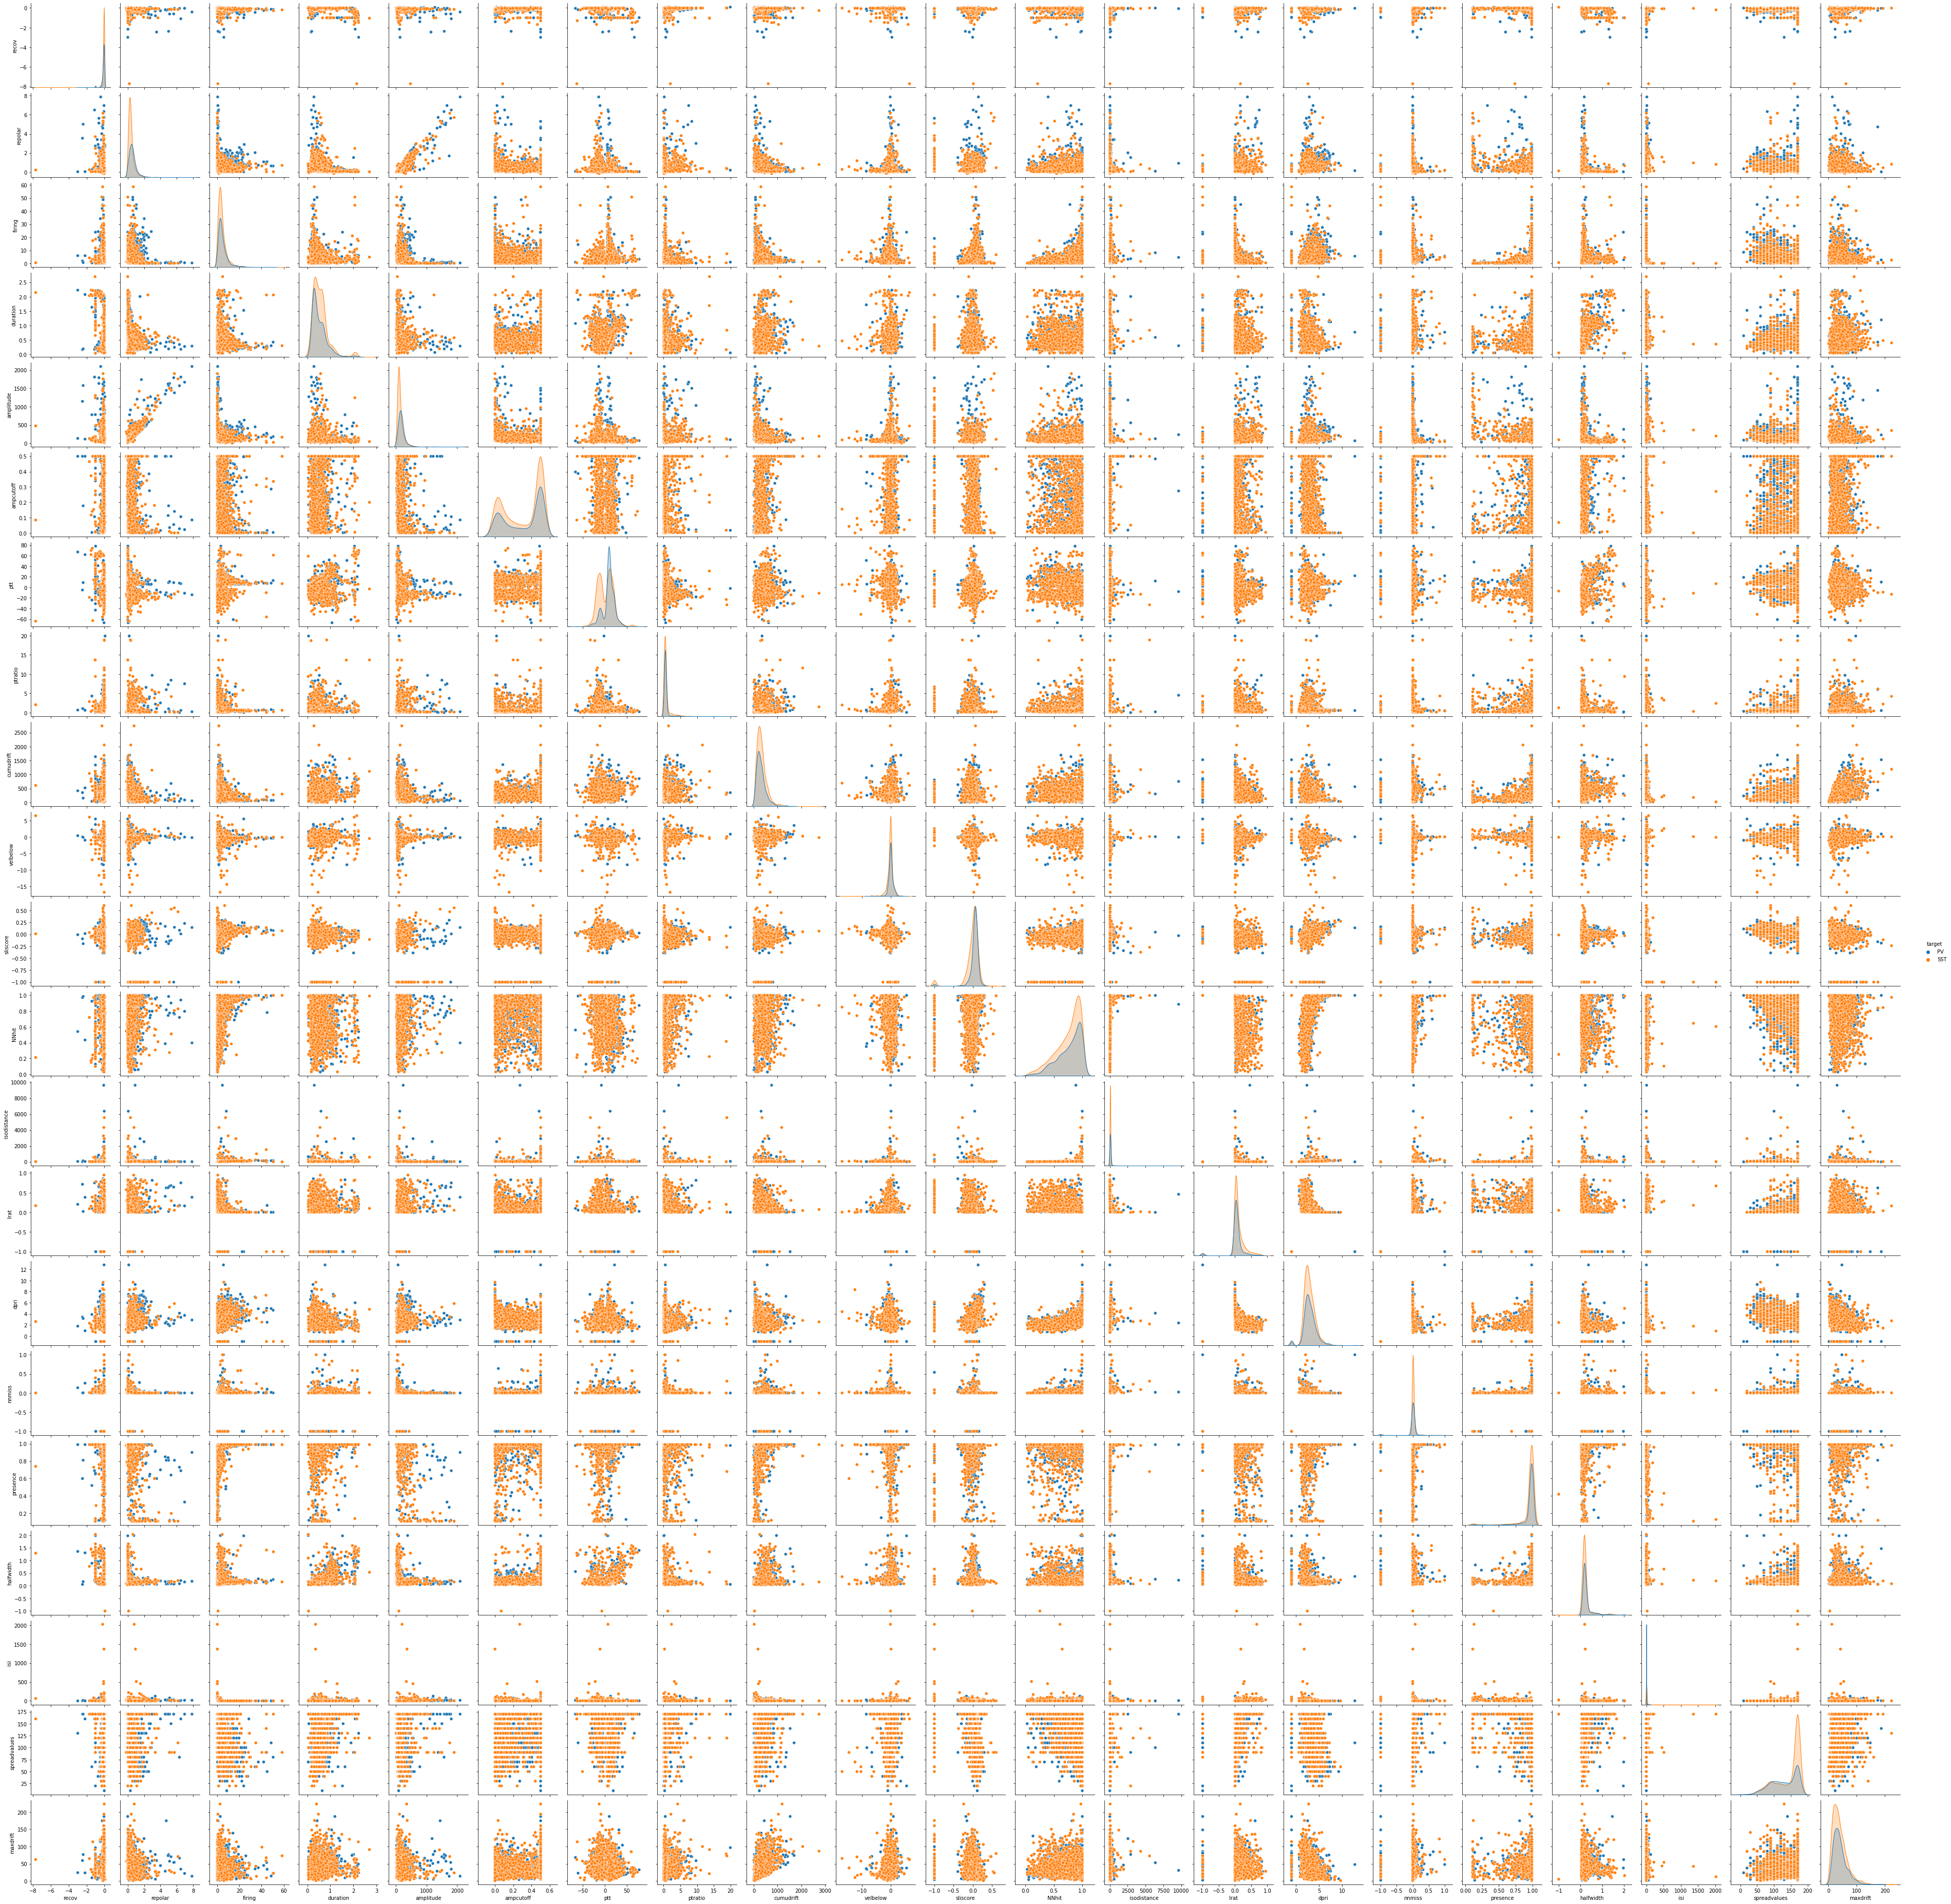

In [ ]:
plt.figure(dpi=1200)
sns.pairplot(df, hue='target');
plt.savefig('pairplot.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_max_array_values(subarrays, unit_id, ax):
    time_interval = 1 / 30000  # Time interval between samples (30 kHz sampling rate)

    max_values = []
    time = []

    max_array_index = np.argmax([np.max(subarray) for subarray in subarrays])
    max_array = subarrays[max_array_index]

    max_value = np.max(max_array)
    max_index = np.argmax(max_array)
    min_value = np.min(max_array)
    min_index = np.argmin(max_array)

    for i, value in enumerate(max_array):
        max_values.append(value)
        time.append(i * time_interval)

    time = np.array(time)  # Convert time list to a NumPy array

    ax.plot(time, max_values)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('mV')
    ax.set_title(f'Values of Array with Global Maximum over Time\nUnit ID: {unit_id}')  # Set the title with unit_id

    ax.axvline(x=time[max_index], color='r', linestyle='--', label='Maximum Value')
    ax.axvline(x=time[min_index], color='b', linestyle='--', label='Minimum Value')
    ax.fill_between(time, max_values, min_value, where=(time >= time[min_index]) & (time <= time[max_index]), alpha=0.3, color='gray')

    ax.legend()

    distance = time[max_index] - time[min_index]
    distance = distance*1000
    ax.text((time[max_index] + time[min_index]) / 2, np.mean(max_values), f'Distance: {distance:.3f} ms', ha='center')

import matplotlib.backends.backend_pdf as pdf
def save_multiple_plots_to_pdf(units,cre_positive_units,filename):
    pdf_filename = f"{filename}.pdf"
    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    plot_count = 0
    with pdf.PdfPages(pdf_filename) as pdf_pages:
        for unit_id in np.random.choice(cre_positive_units, 50, replace=False):
            subarrays = units.waveform_mean[unit_id]  # Get subarrays for a specific unit_id

            ax = axs[plot_count // 4, plot_count % 4]
            plot_max_array_values(subarrays, unit_id, ax)  # Plot the values

            plot_count += 1
            if plot_count == 16:
                plt.tight_layout()
                pdf_pages.savefig(fig)

                plt.close()
                fig, axs = plt.subplots(4, 4, figsize=(16, 16))
                plot_count = 0

        # Check if there are remaining plots that haven't been saved
        if plot_count > 0:
            plt.tight_layout()
            pdf_pages.savefig(fig)

    print(f"Graphs saved to '{pdf_filename}' successfully.")



Graphs saved to 'pval_198.pdf' successfully.
Graphs saved to 'sst_304.pdf' successfully.
Graphs saved to 'sst_890.pdf' successfully.
Graphs saved to 'pval_460.pdf' successfully.
Graphs saved to 'pval_107.pdf' successfully.
Graphs saved to 'pval_512.pdf' successfully.
Graphs saved to 'pval_633.pdf' successfully.
Graphs saved to 'sst_117.pdf' successfully.
Graphs saved to 'pval_788.pdf' successfully.
Graphs saved to 'sst_548.pdf' successfully.
Graphs saved to 'sst_300.pdf' successfully.
Graphs saved to 'pval_314.pdf' successfully.
Graphs saved to 'sst_756.pdf' successfully.
Graphs saved to 'sst_154.pdf' successfully.


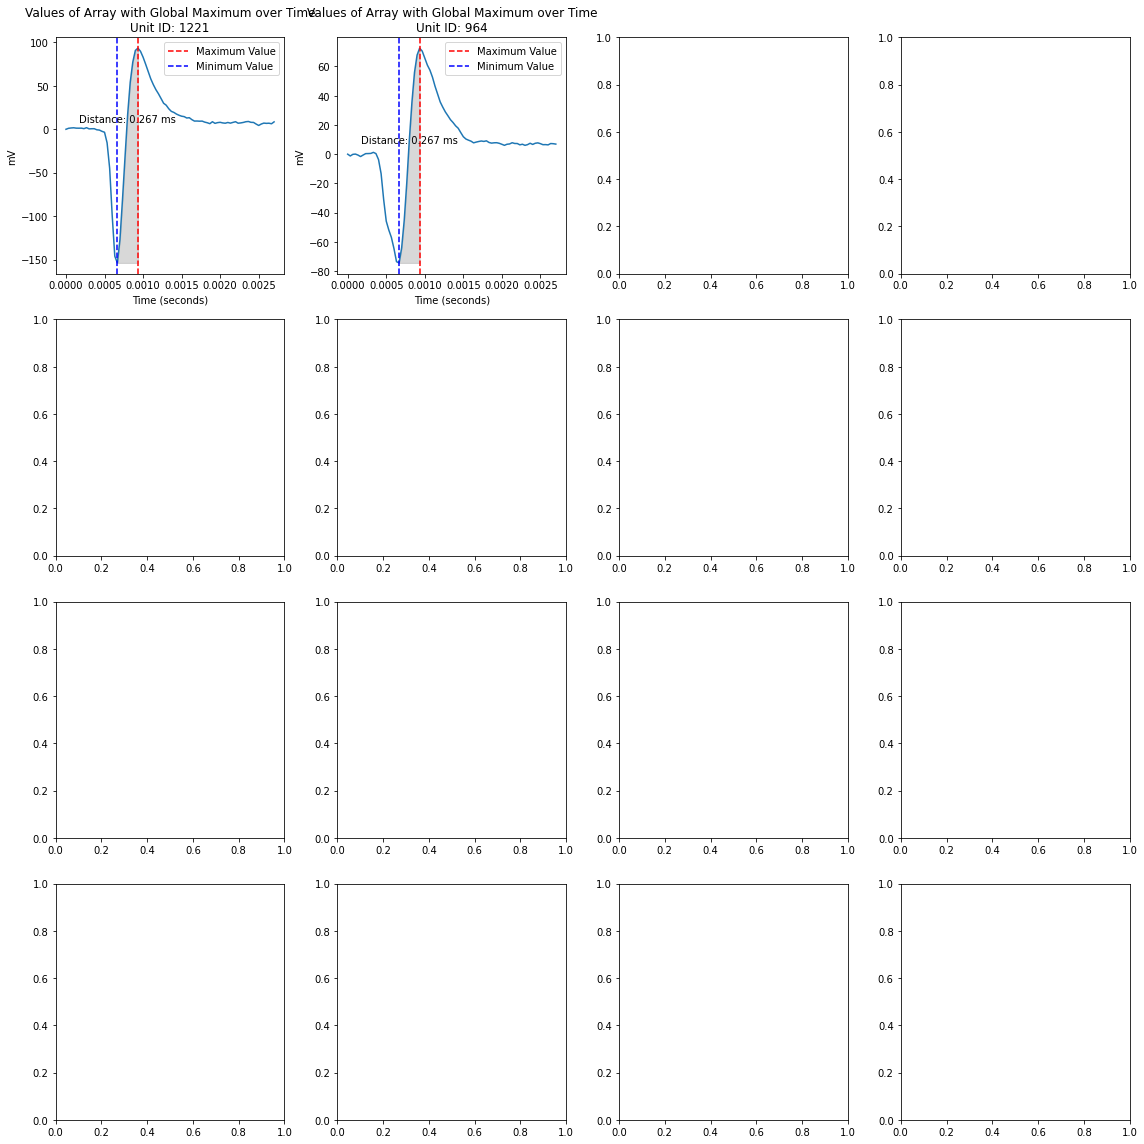

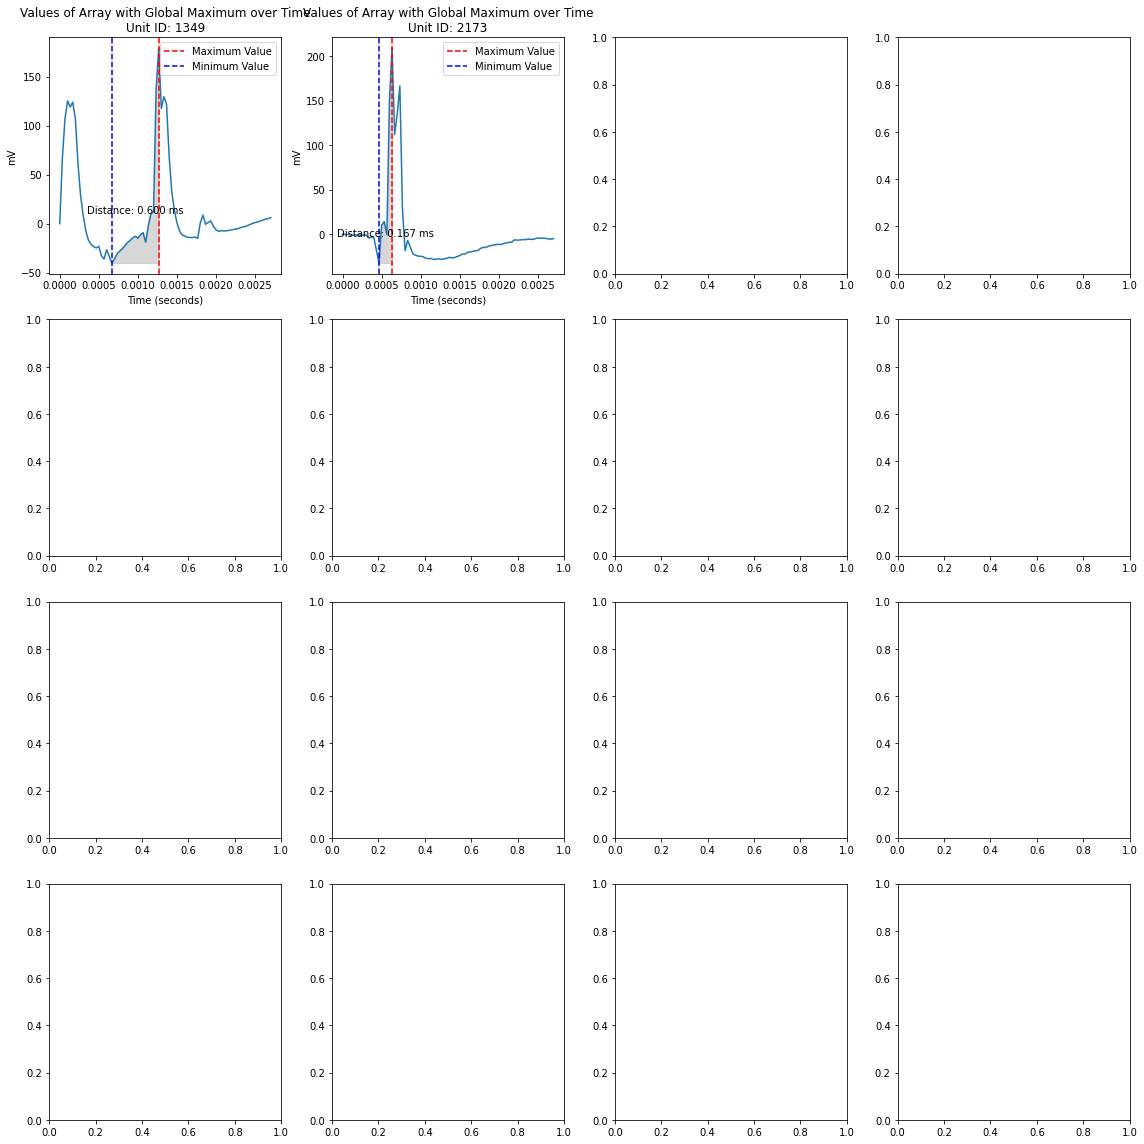

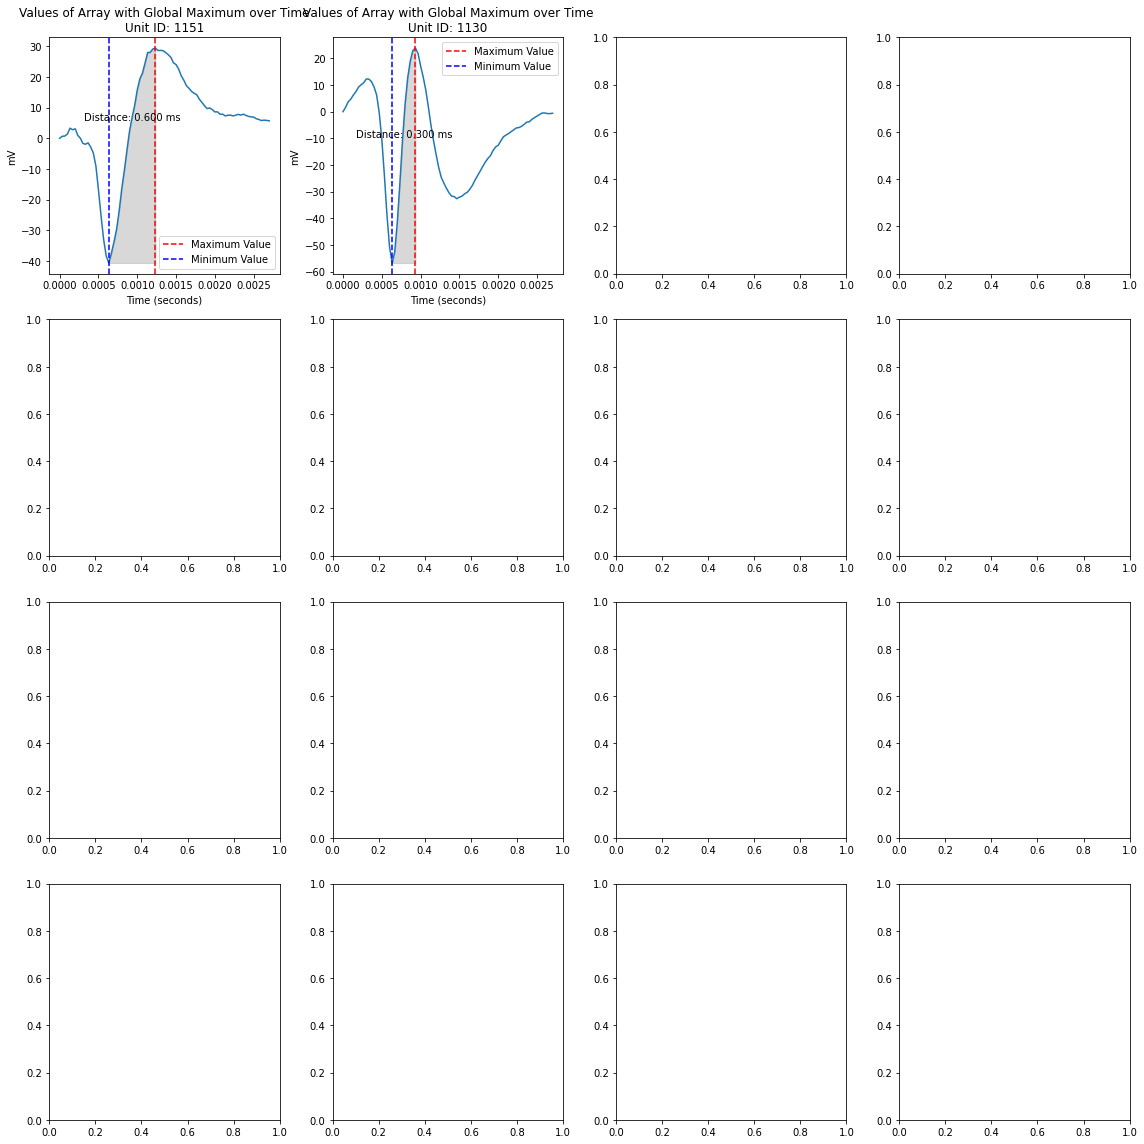

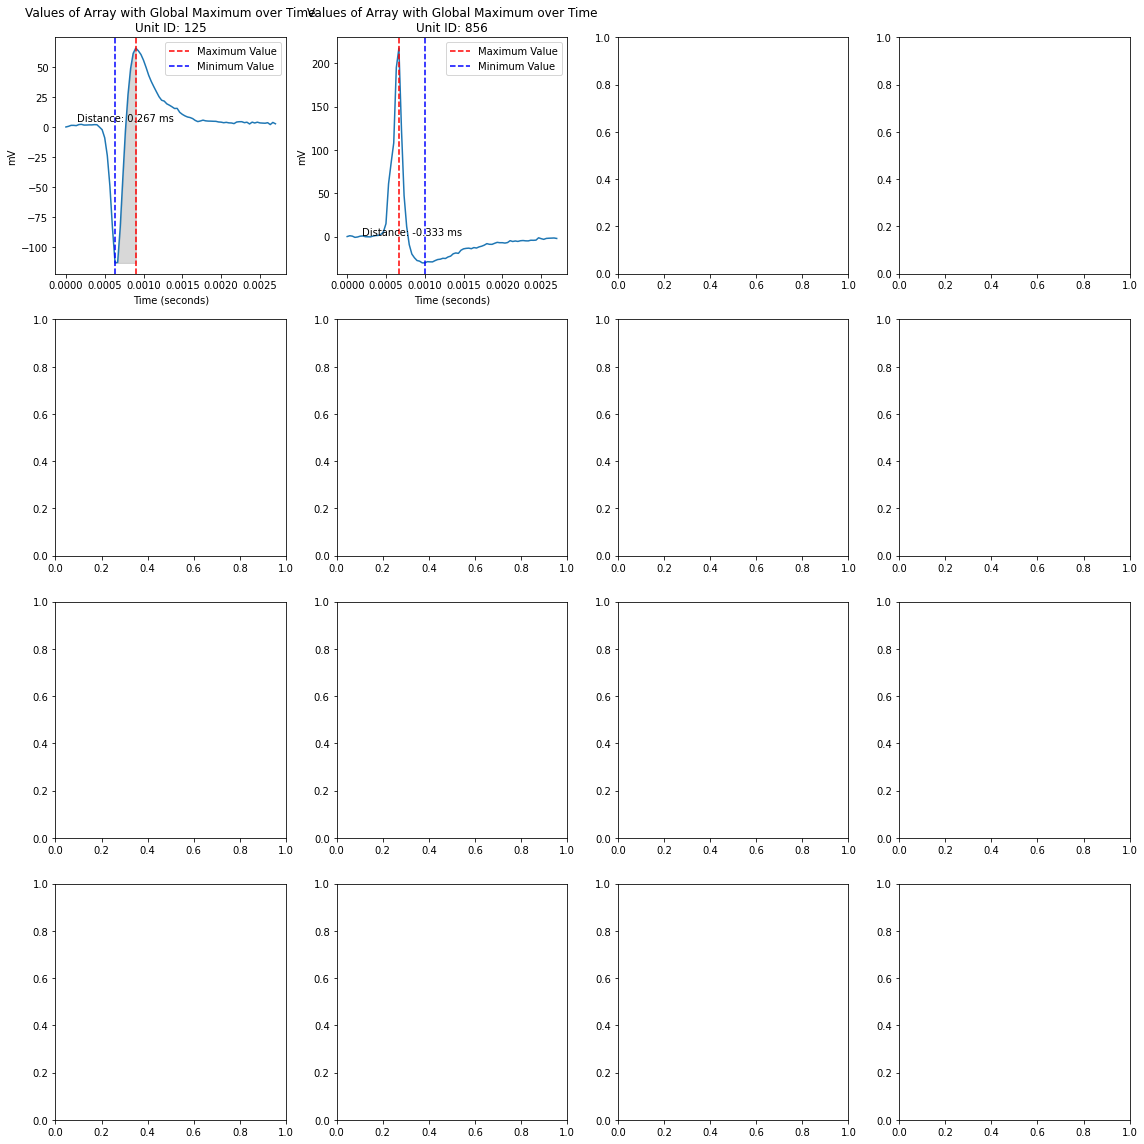

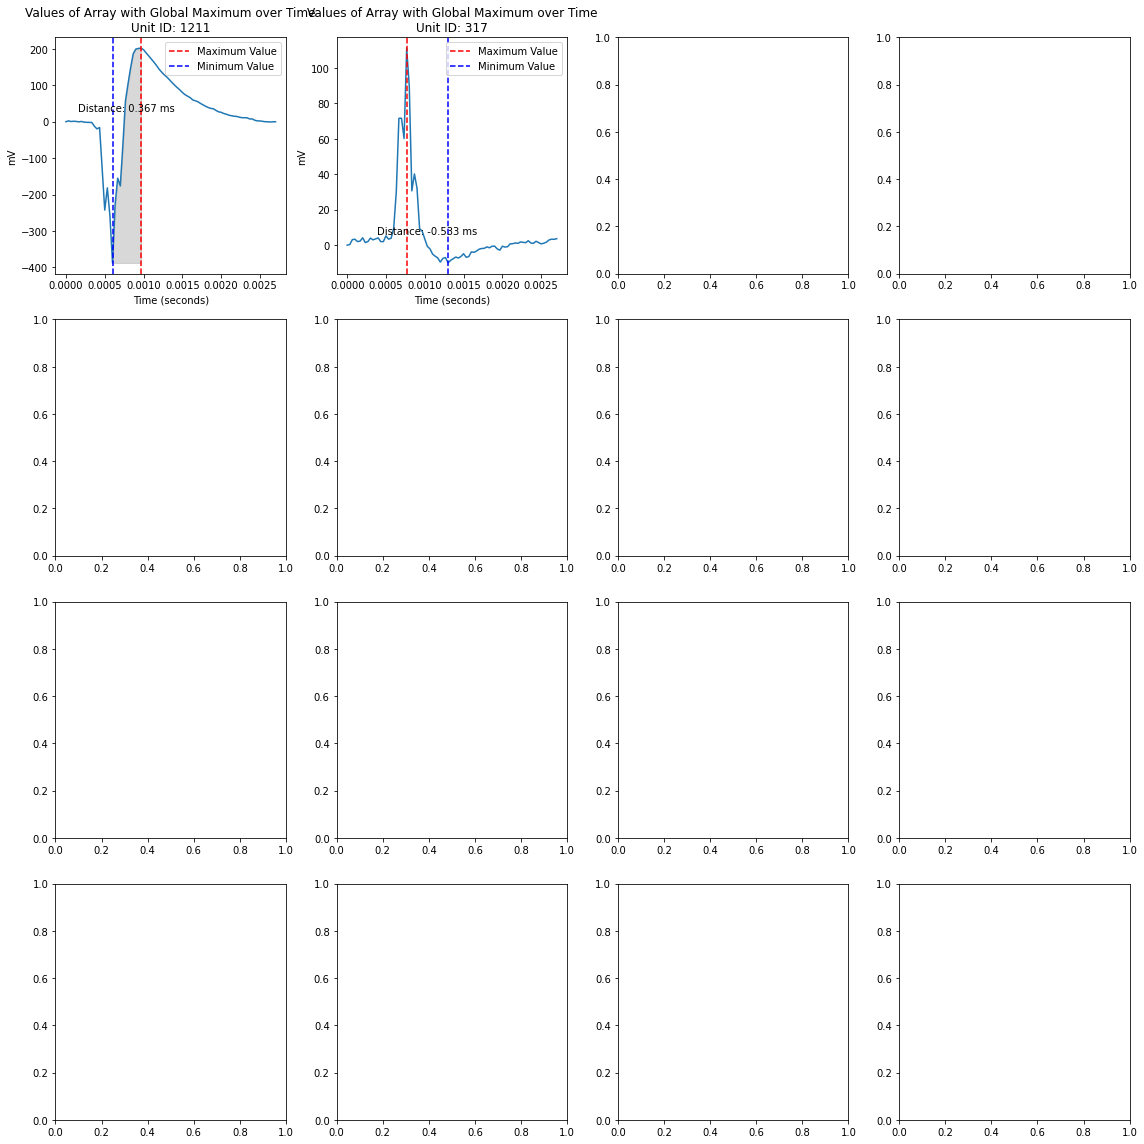

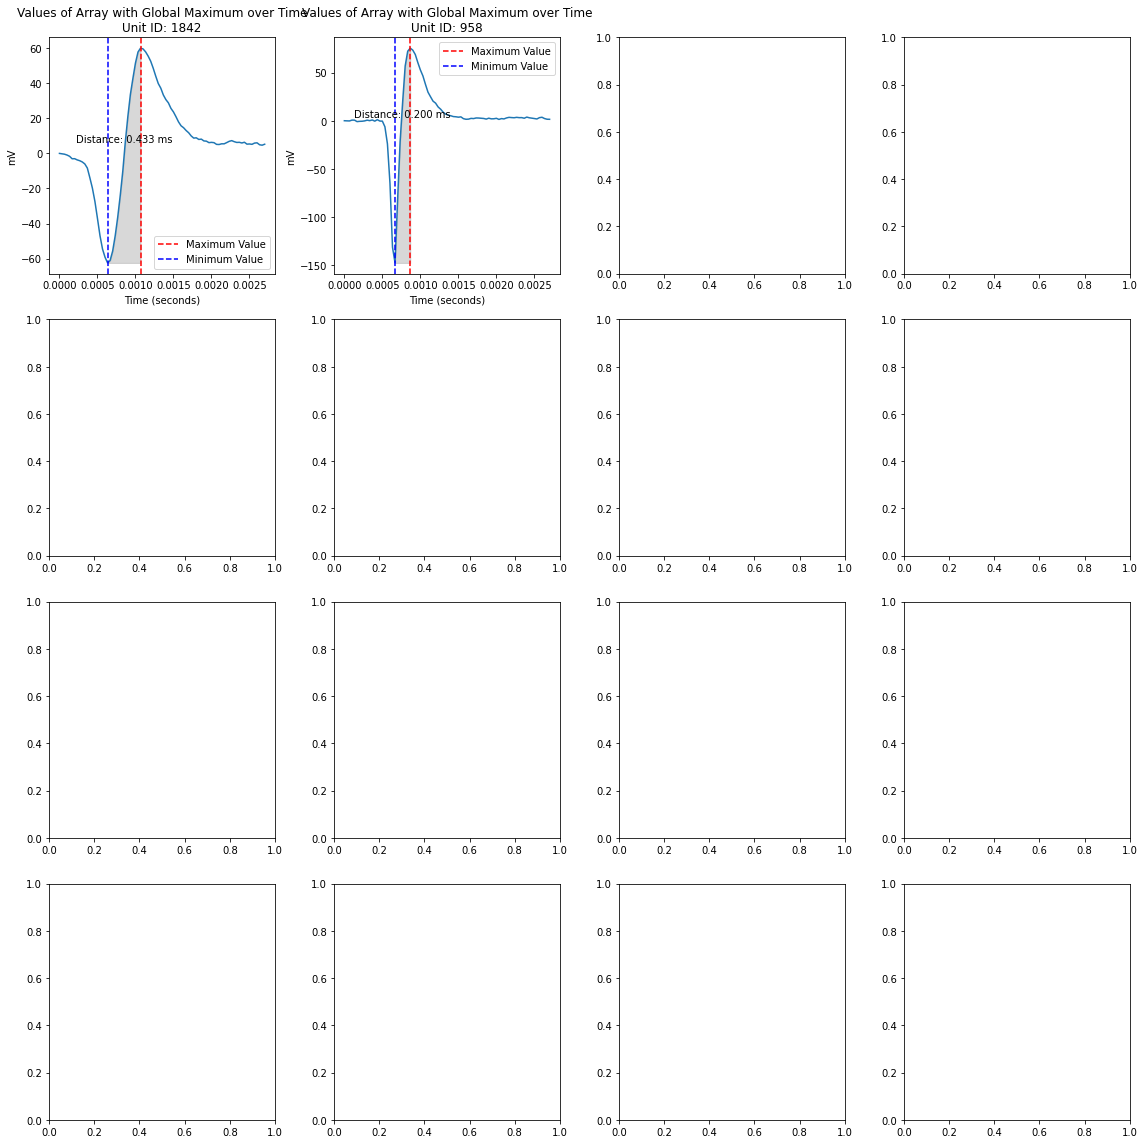

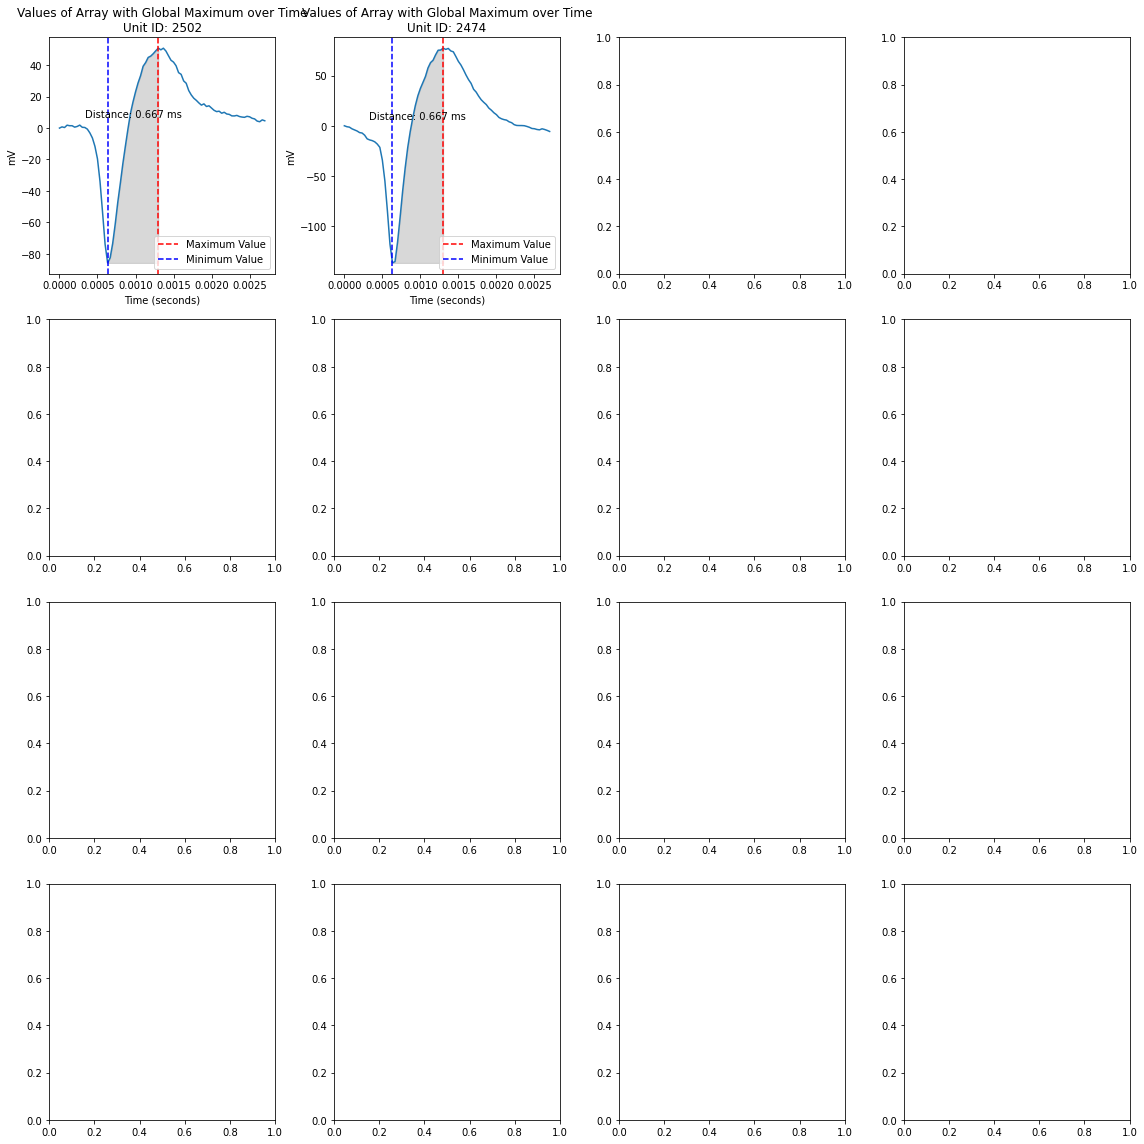

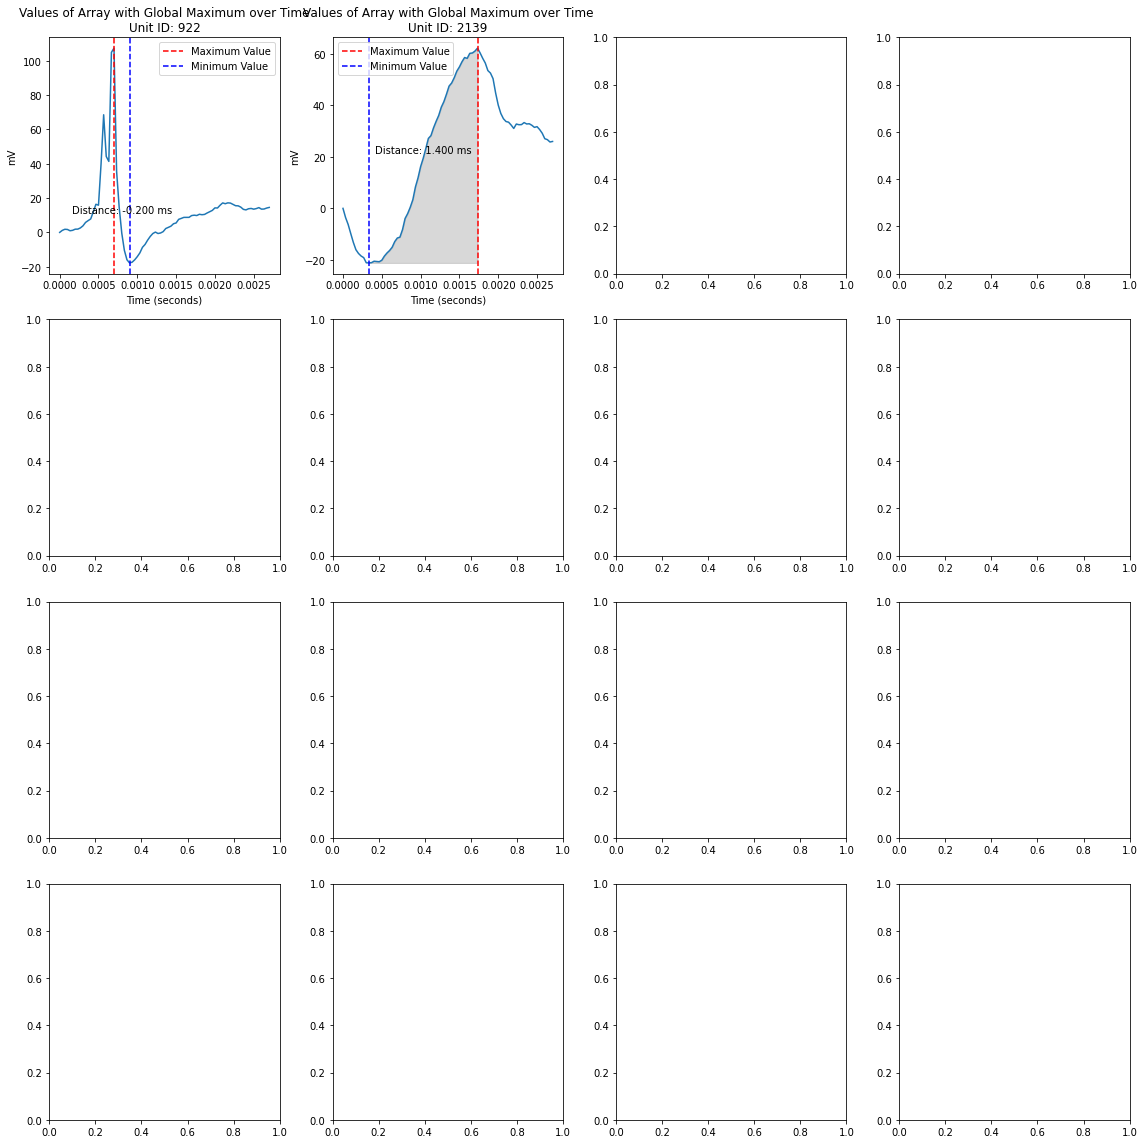

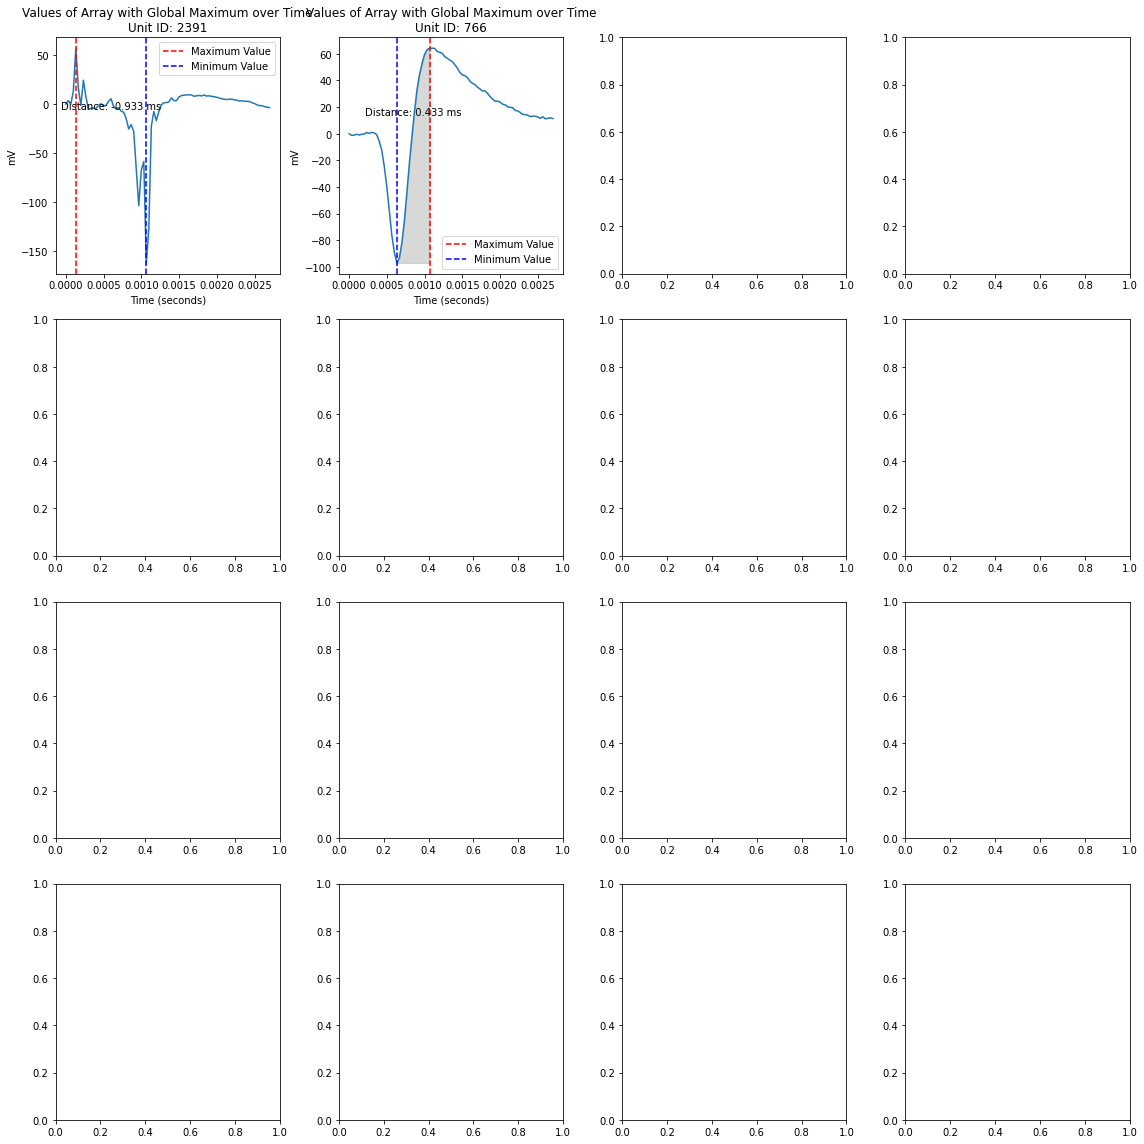

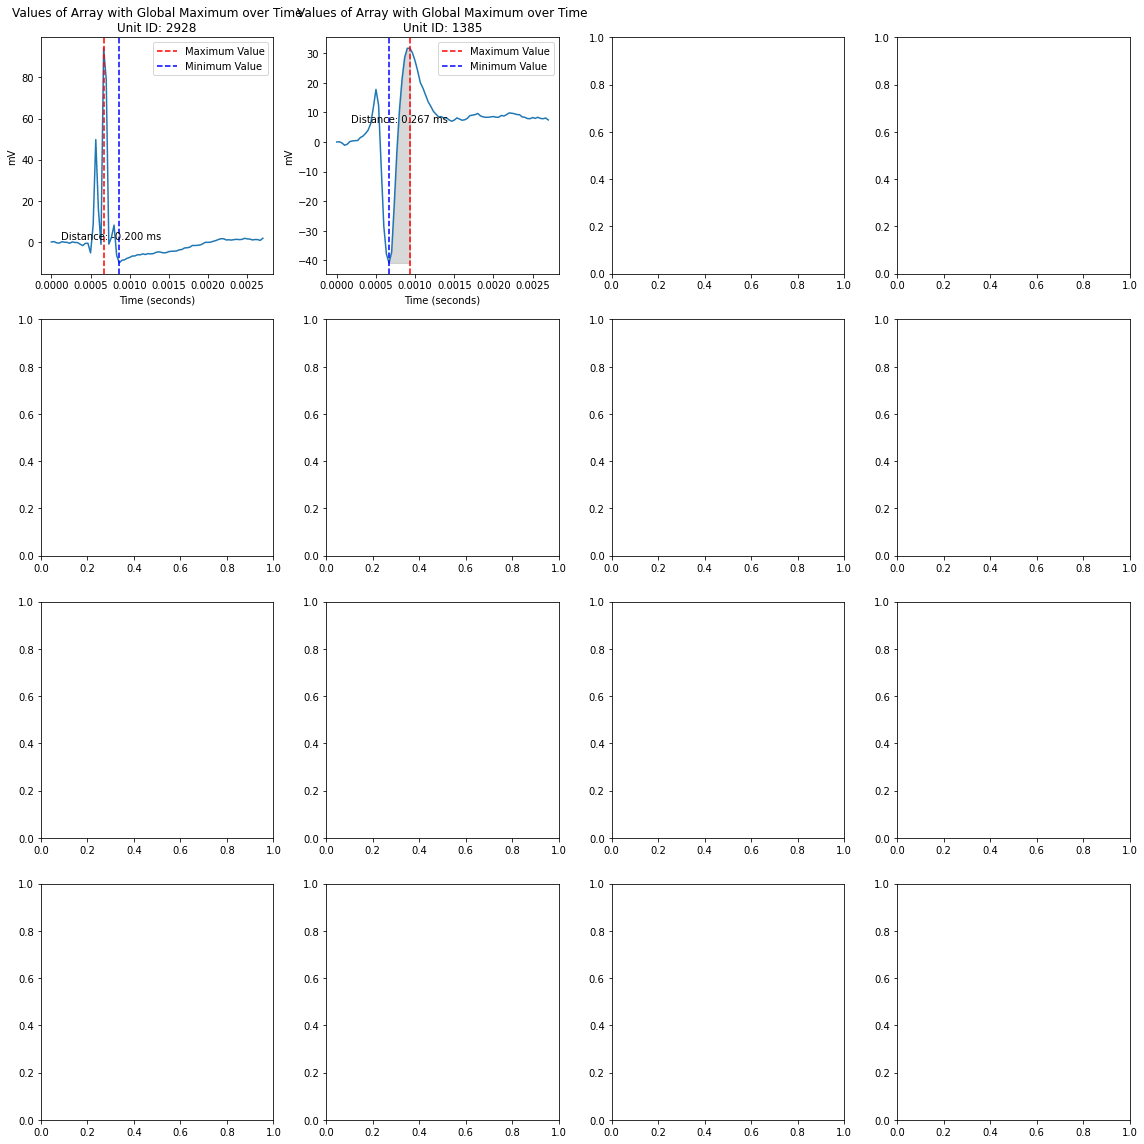

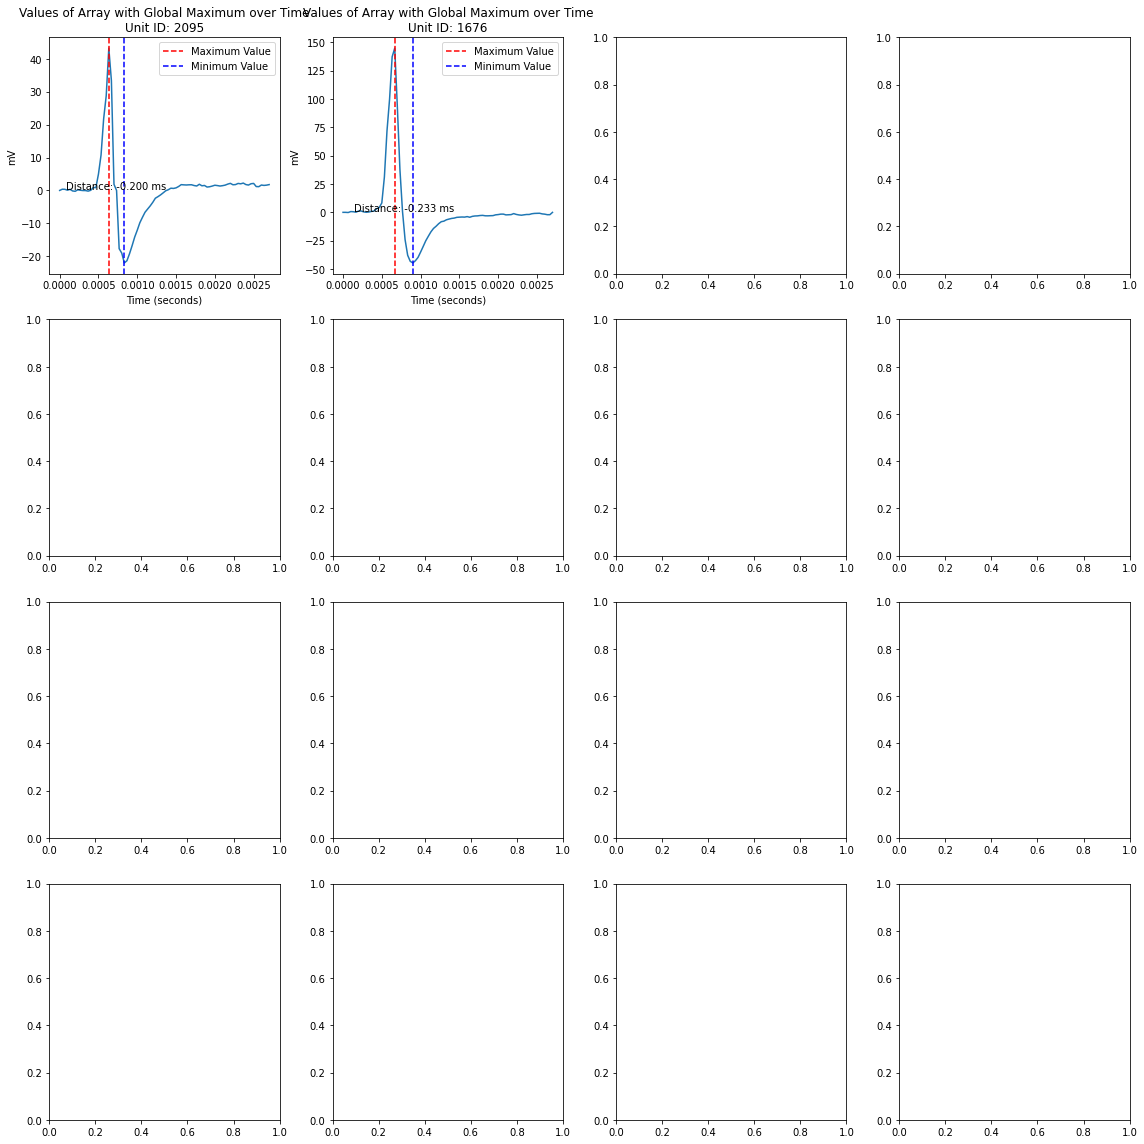

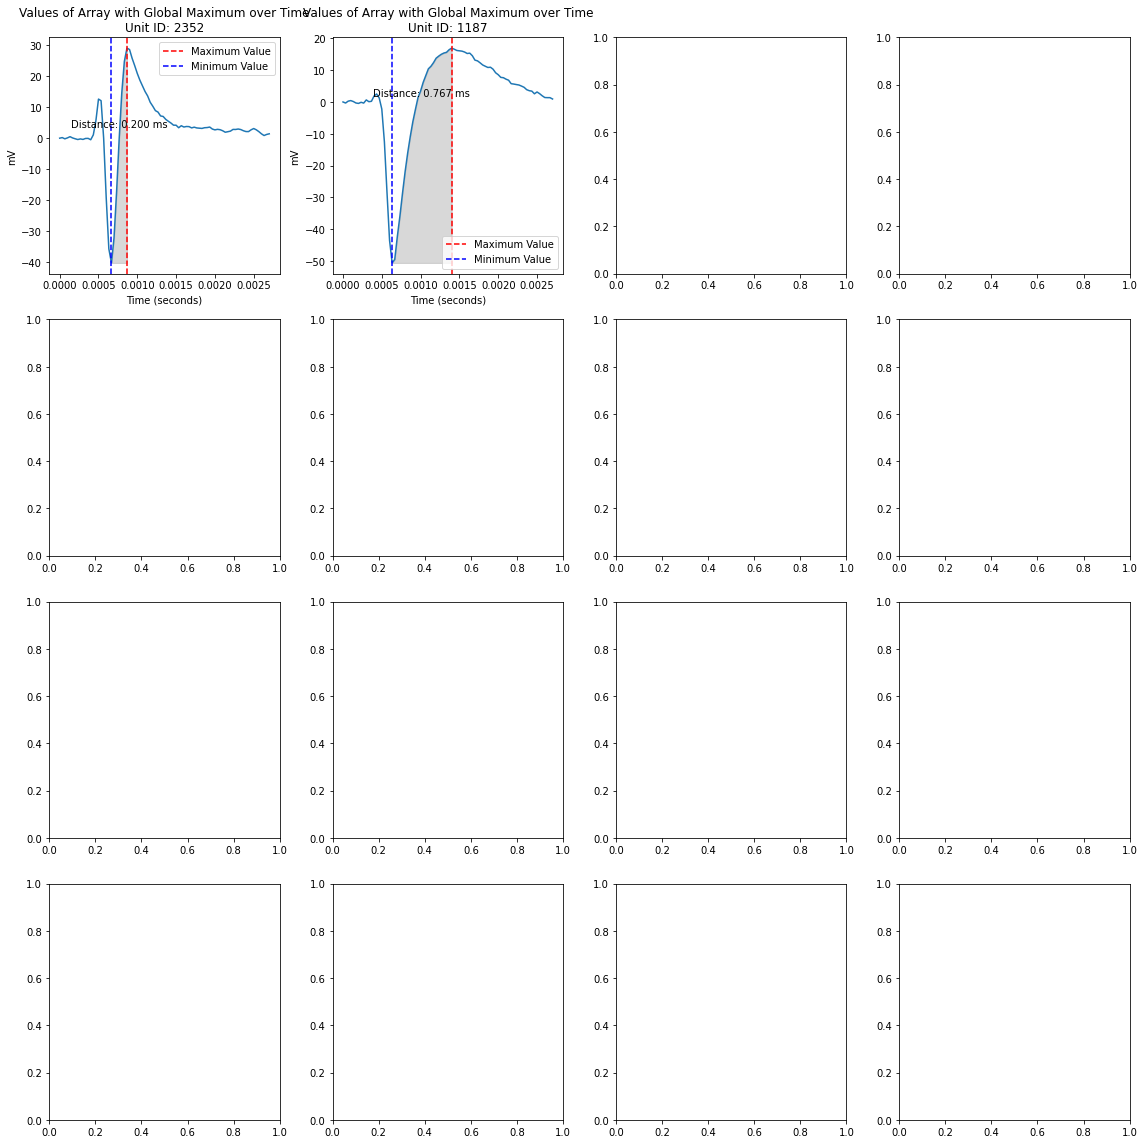

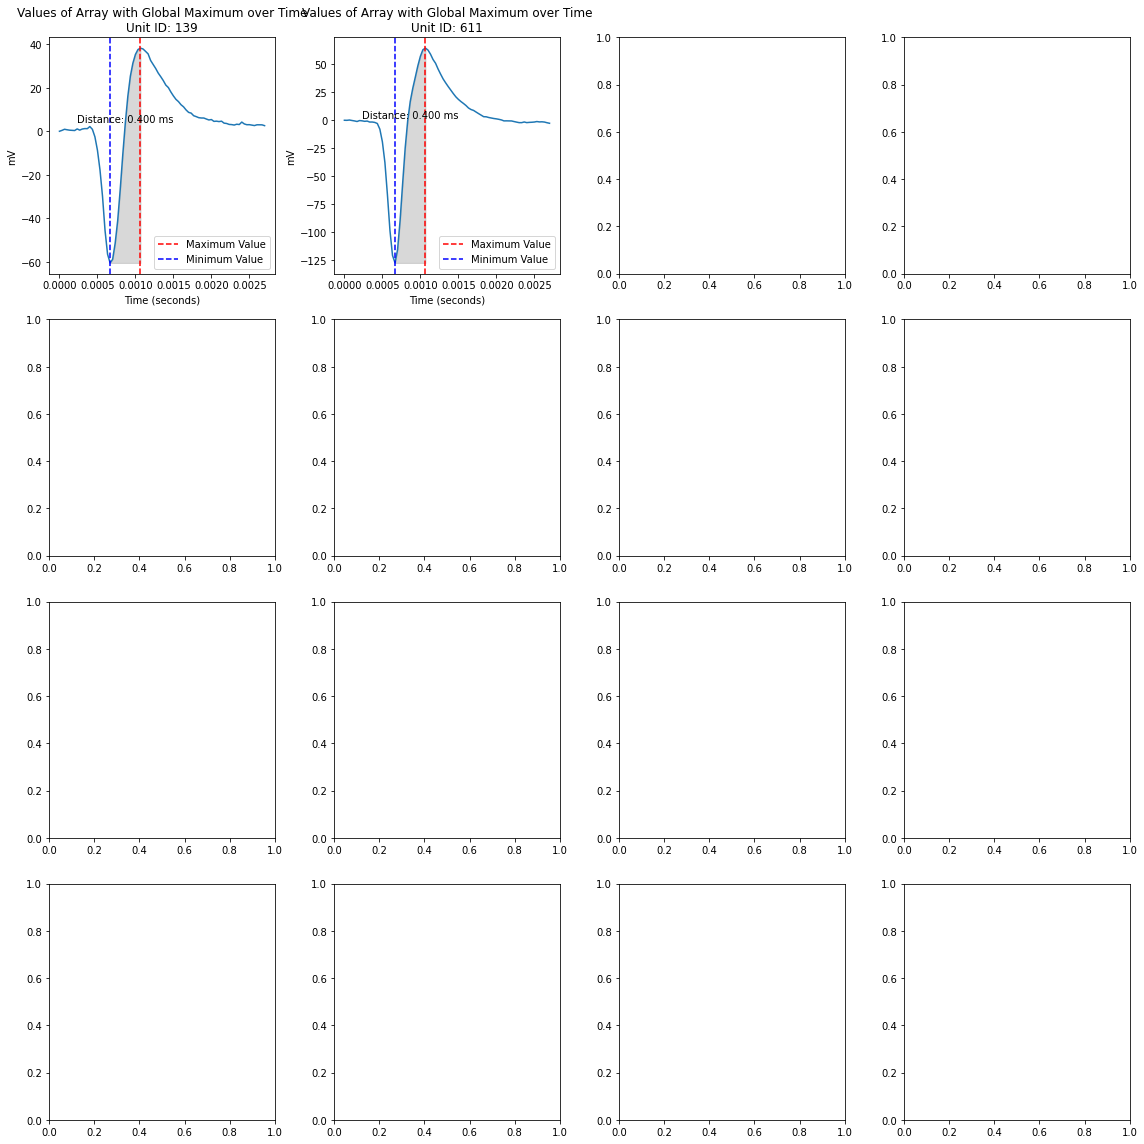

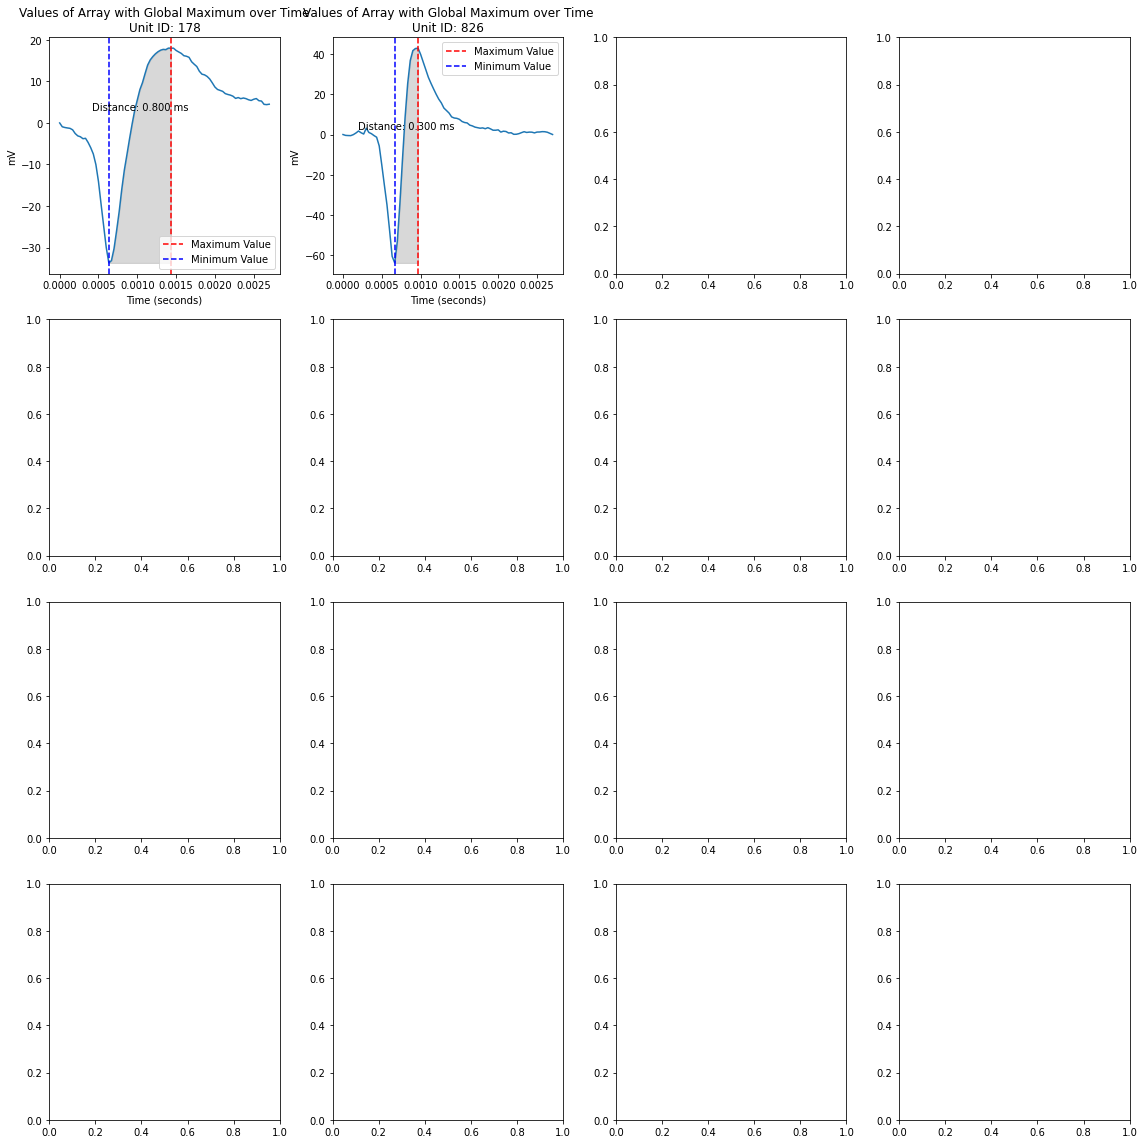

In [ ]:
save_multiple_plots_to_pdf(units_198,cre_pos_units_198,'pval_198')
save_multiple_plots_to_pdf(units_304,cre_pos_units_304,'sst_304')
save_multiple_plots_to_pdf(units_890,cre_pos_units_890,'sst_890')
save_multiple_plots_to_pdf(units_460,cre_pos_units_460,'pval_460')
save_multiple_plots_to_pdf(units_107,cre_pos_units_107,'pval_107')
save_multiple_plots_to_pdf(units_512,cre_pos_units_512,'pval_512')
save_multiple_plots_to_pdf(units_633,cre_pos_units_633,'pval_633')
save_multiple_plots_to_pdf(units_117,cre_pos_units_117,'sst_117')
save_multiple_plots_to_pdf(units_788,cre_pos_units_788,'pval_788')
save_multiple_plots_to_pdf(units_548,cre_pos_units_548,'sst_548')
save_multiple_plots_to_pdf(units_300,cre_pos_units_300,'sst_300')
save_multiple_plots_to_pdf(units_314,cre_pos_units_314,'pval_314')
save_multiple_plots_to_pdf(units_756,cre_pos_units_756,'sst_756')
save_multiple_plots_to_pdf(units_154,cre_pos_units_154,'sst_154')

In [ ]:
type(cre_pos_units_107)

numpy.ndarray

In [ ]:
fig = plt.figure()
plt.hist(pval_repolar, alpha=0.5, label = "PV")
plt.hist(sst_repolar, alpha=0.5, label = "SST")
plt.xlabel("Rate")
plt.ylabel("Number of Units")
plt.legend()

NameError: ignored

<Figure size 432x288 with 0 Axes>

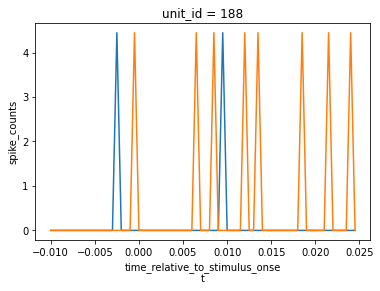

In [ ]:
damean = da.mean(dim='trial_id').T / time_resolution
damean1 = damean.sel(unit_id = 187)
damean2 = damean.sel(unit_id = 188)
damean1.plot()
damean2.plot()

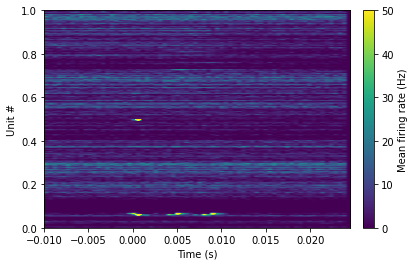

In [ ]:
plt.imshow(da.mean(dim='trial_id').T / time_resolution,
              extent=[np.min(bin_edges), np.max(bin_edges),
               0, 2000],
               aspect='auto', vmin=0, vmax=50)
plt.xlabel('Time (s)')
plt.ylabel('Unit #')
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.set_label('Mean firing rate (Hz)')
firing_rate_matrix = plt.imshow(da.mean(dim='trial_id').T / time_resolution,
              extent=[np.min(bin_edges), np.max(bin_edges),
               0, 1],
               aspect='auto', vmin=0, vmax=50)